In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj


import warnings
warnings.filterwarnings("ignore")

## Carrega os dados grav

In [2]:
# path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
# path_topography = ensaio.fetch_earth_topography(version=1)
# path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [3]:
# data = pd.read_csv(path_gravity)
data = pd.read_csv('gravity_table.csv', delimiter=';')
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965


In [4]:
# print(np.max(data.latitude))
# print(np.min(data.latitude))
# print(np.max(data.longitude))
# print(np.min(data.longitude))


In [5]:
# topography = xr.load_dataarray(path_topography)
# geoid = xr.load_dataarray(path_geoid)

In [6]:
# West, East, South, North (degrees)
# region = (-42, -41, -21, -20)
# region = (-41.5569883888889, -41.2805198611111, -20.8007570833333, -20.5533338333333)
region = (-41.5572222222, -41.2802777778, -20.8008333333, -20.5533333333)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0.02)
# region = region_pad

In [7]:
topography = pygmt.datasets.load_earth_relief(resolution="03s", region=region_pad)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})
topography

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -41.5772222222 to -41.5775
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -41.2602777778 to -41.26


<xarray.DataArray 'elevation' (latitude: 351, longitude: 386)>
array([[772., 736., 686., ..., 132., 142., 126.],
       [794., 751., 697., ..., 129., 130., 118.],
       [806., 762., 716., ..., 109., 107., 104.],
       ...,
       [737., 765., 811., ..., 290., 290., 294.],
       [757., 787., 838., ..., 262., 262., 267.],
       [797., 818., 853., ..., 274., 260., 266.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [8]:
# data = data[vd.inside((data.Longitude, data.Latitude), region)]
# data

In [9]:
# geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# geoid = -5.6 # constante

In [10]:
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# topography = topography.sel(lon=slice(*region_pad[:2]), lat=slice(*region_pad[2:]))
topography

<xarray.DataArray 'elevation' (latitude: 345, longitude: 380)>
array([[698., 720., 713., ..., 116., 106., 109.],
       [709., 732., 726., ..., 130., 115., 107.],
       [720., 743., 746., ..., 149., 131., 113.],
       ...,
       [770., 745., 737., ..., 291., 313., 311.],
       [796., 770., 756., ..., 283., 290., 288.],
       [819., 786., 754., ..., 264., 277., 296.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.54 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [11]:
# Criar uma cópia com valores constantes
# constant_value = -5.6
# geoid = topography.copy()
# geoid.values = np.ones(np.shape(topography.values))*constant_value
# geoid

path_geoid  = ensaio.fetch_earth_geoid(version=1)
geoid = xr.load_dataarray(path_geoid)
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
interpolator = vd.KNeighbors()

geoid_table = vd.grid_to_table(geoid)
geoid_1 = vd.grid_to_table(topography)


interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
geoid_1 = geoid_1.assign(elevation=interpolator.predict((geoid_1.longitude, geoid_1.latitude)))

geoid_values = np.reshape(geoid_1.elevation, topography.shape)
geoid = xr.DataArray(geoid_values, coords=[topography.latitude, topography.longitude], dims=['latitude', 'longitude'])
geoid

<xarray.DataArray (latitude: 345, longitude: 380)>
array([[-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       ...,
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.54 -20.53 -20.53
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26

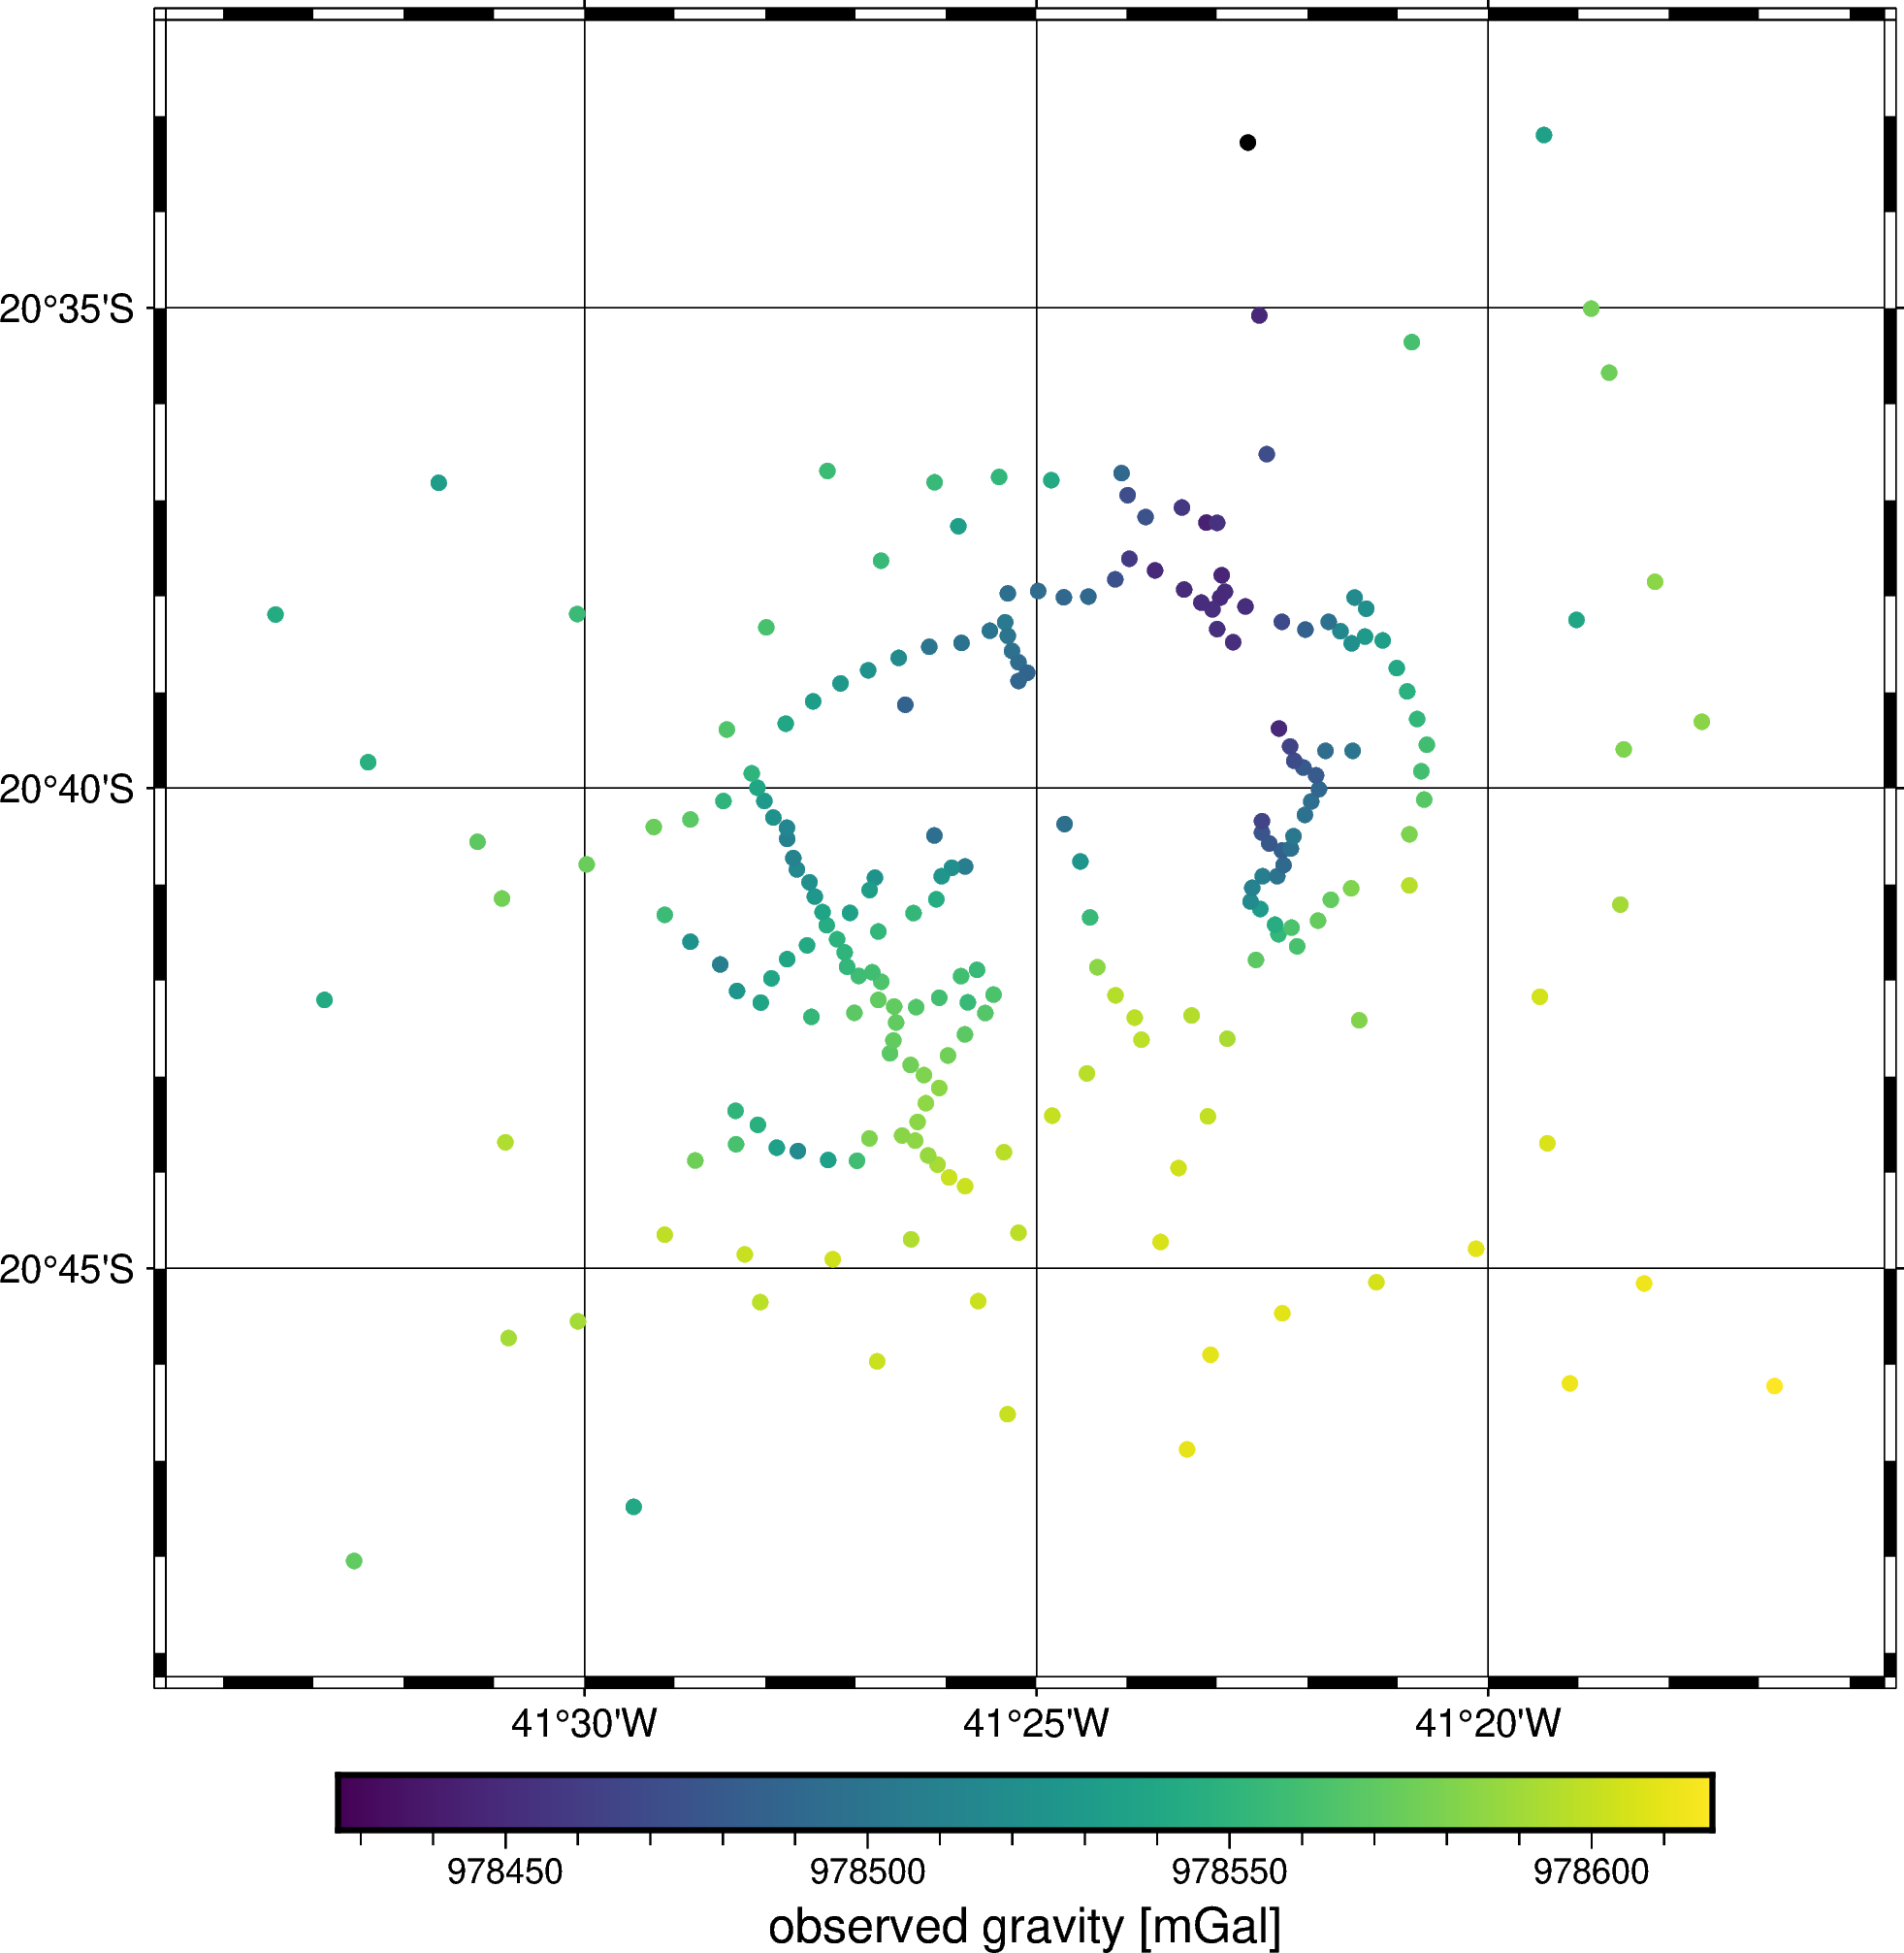

In [70]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

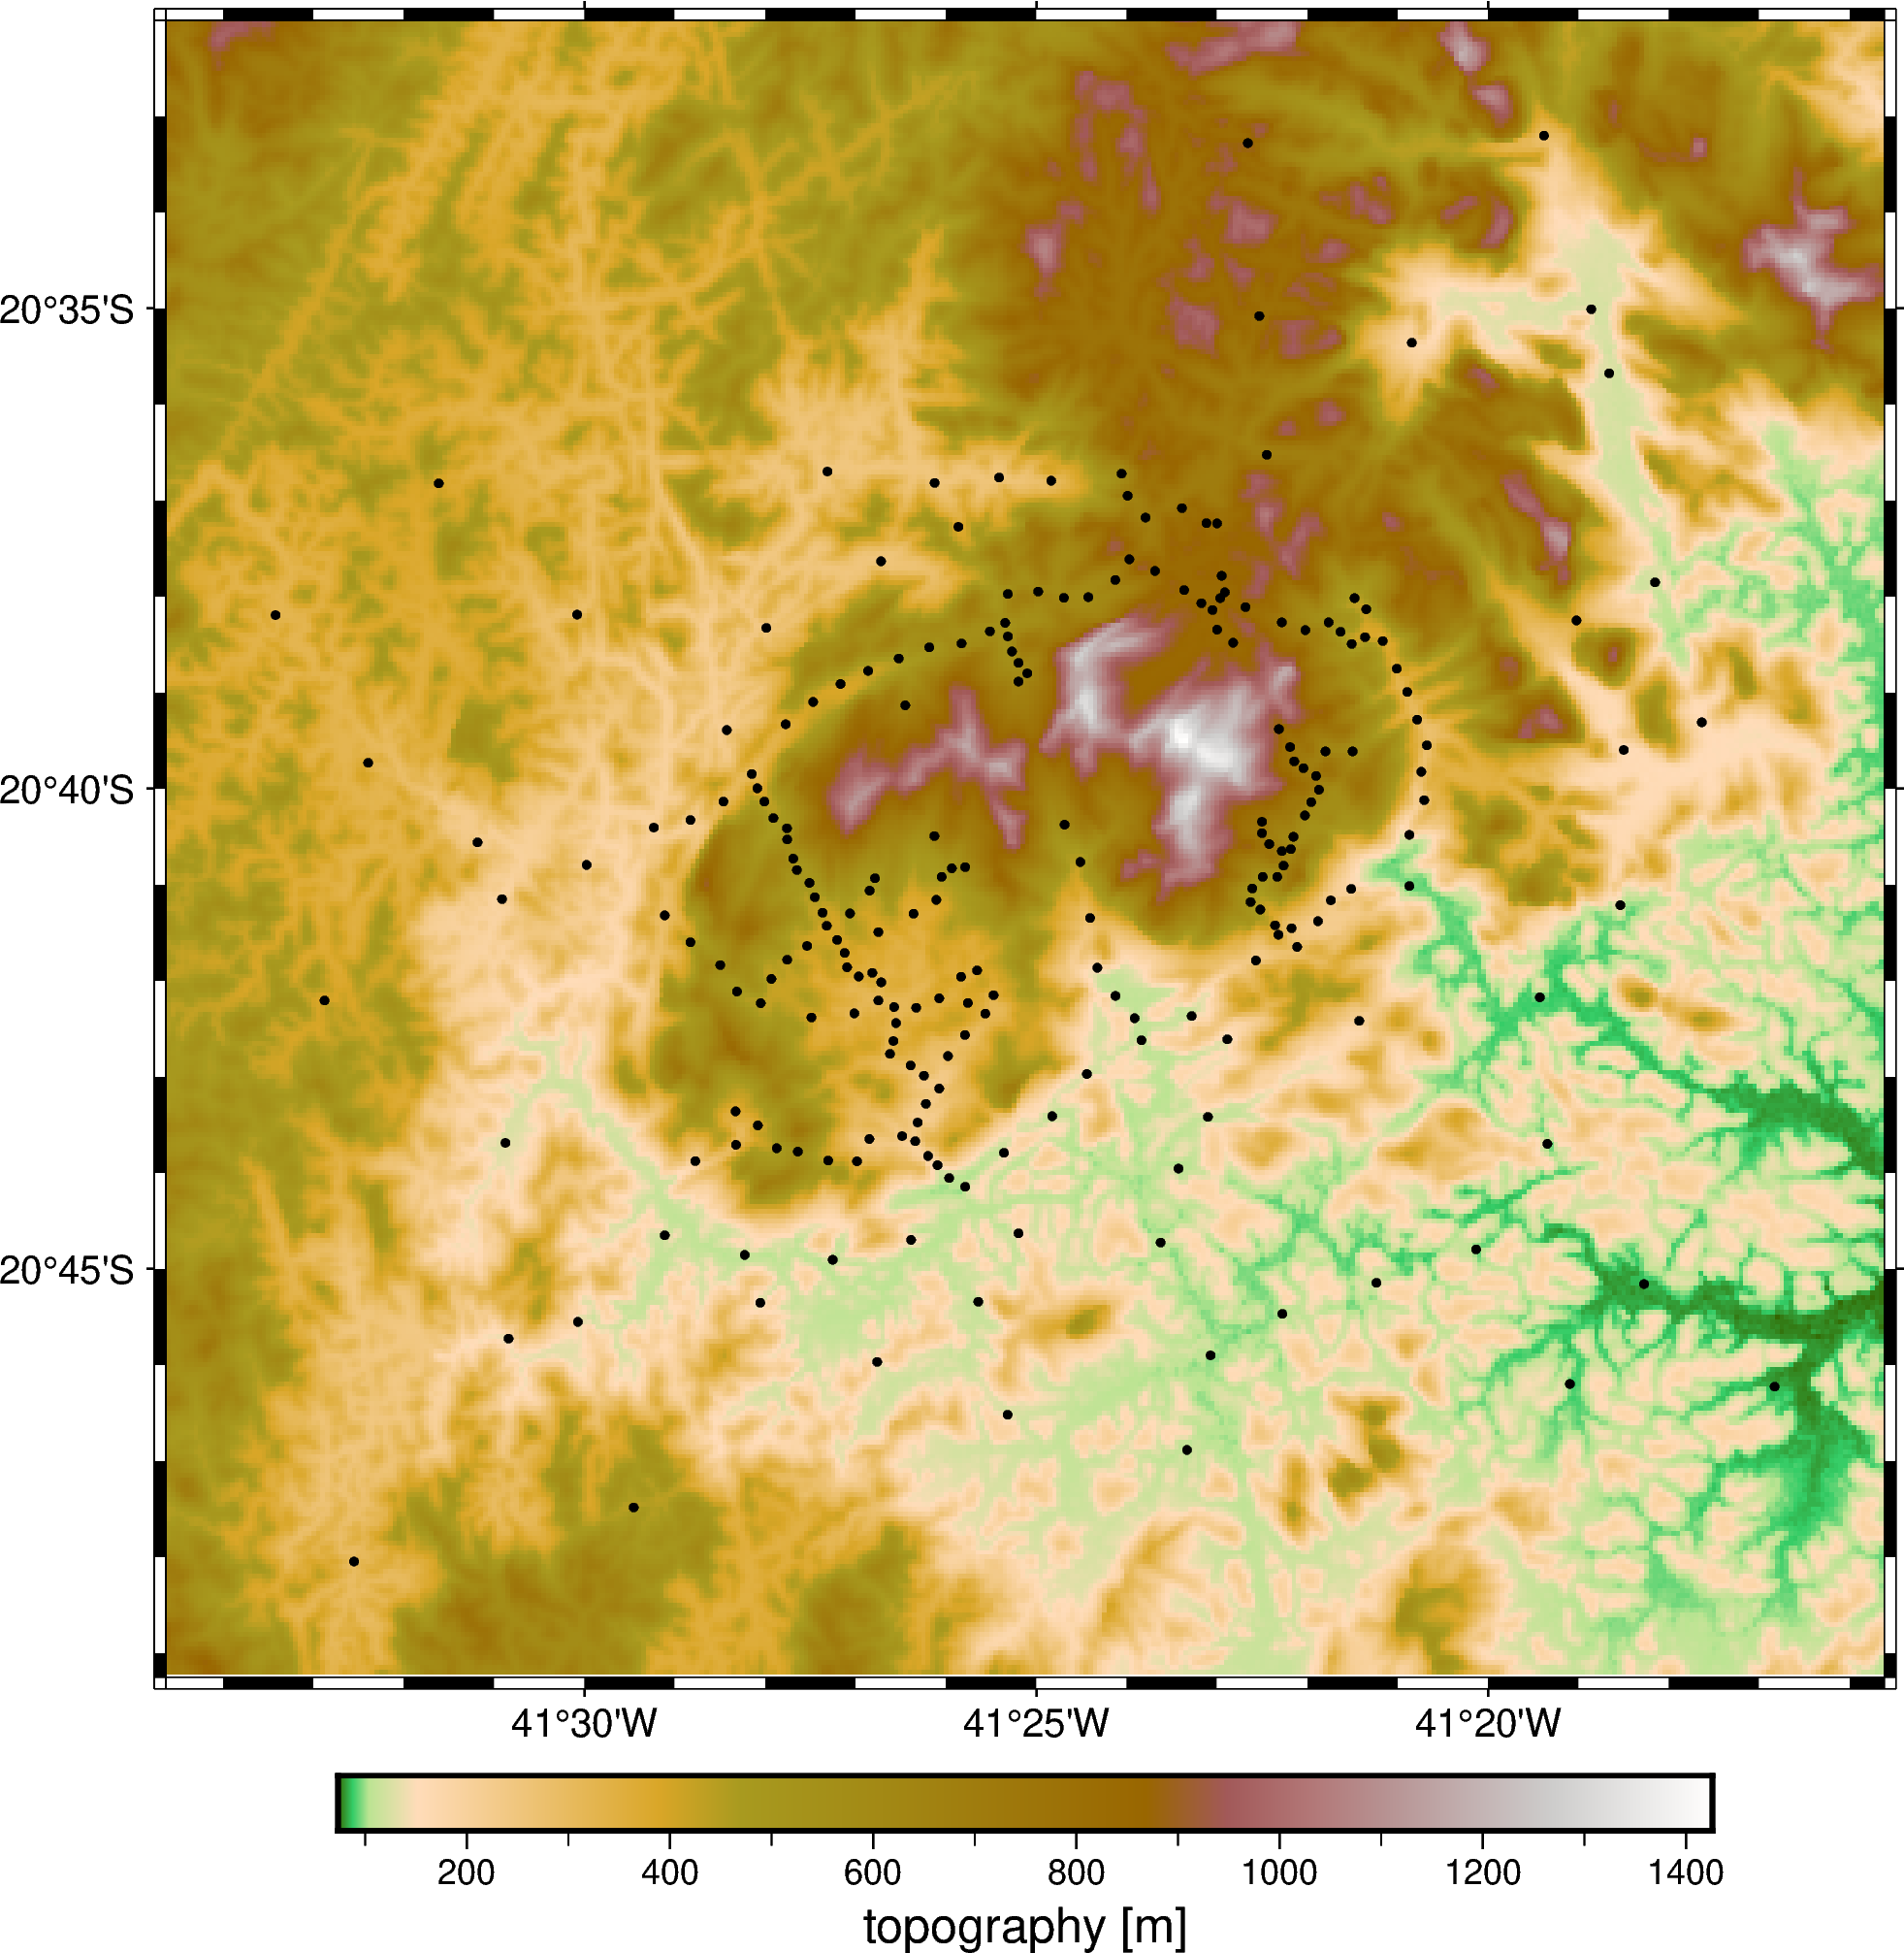

In [71]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
)
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [14]:
topography_geometric = topography + geoid
topography_geometric

<xarray.DataArray (latitude: 345, longitude: 380)>
array([[692.4, 714.4, 707.4, ..., 109.7,  99.7, 102.7],
       [703.4, 726.4, 720.4, ..., 123.7, 108.7, 100.7],
       [714.4, 737.4, 740.4, ..., 142.7, 124.7, 106.7],
       ...,
       [764.4, 739.4, 731.4, ..., 284.7, 306.7, 304.7],
       [790.4, 764.4, 750.4, ..., 276.7, 283.7, 281.7],
       [813.4, 780.4, 748.4, ..., 257.7, 270.7, 289.7]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.54 -20.53 -20.53

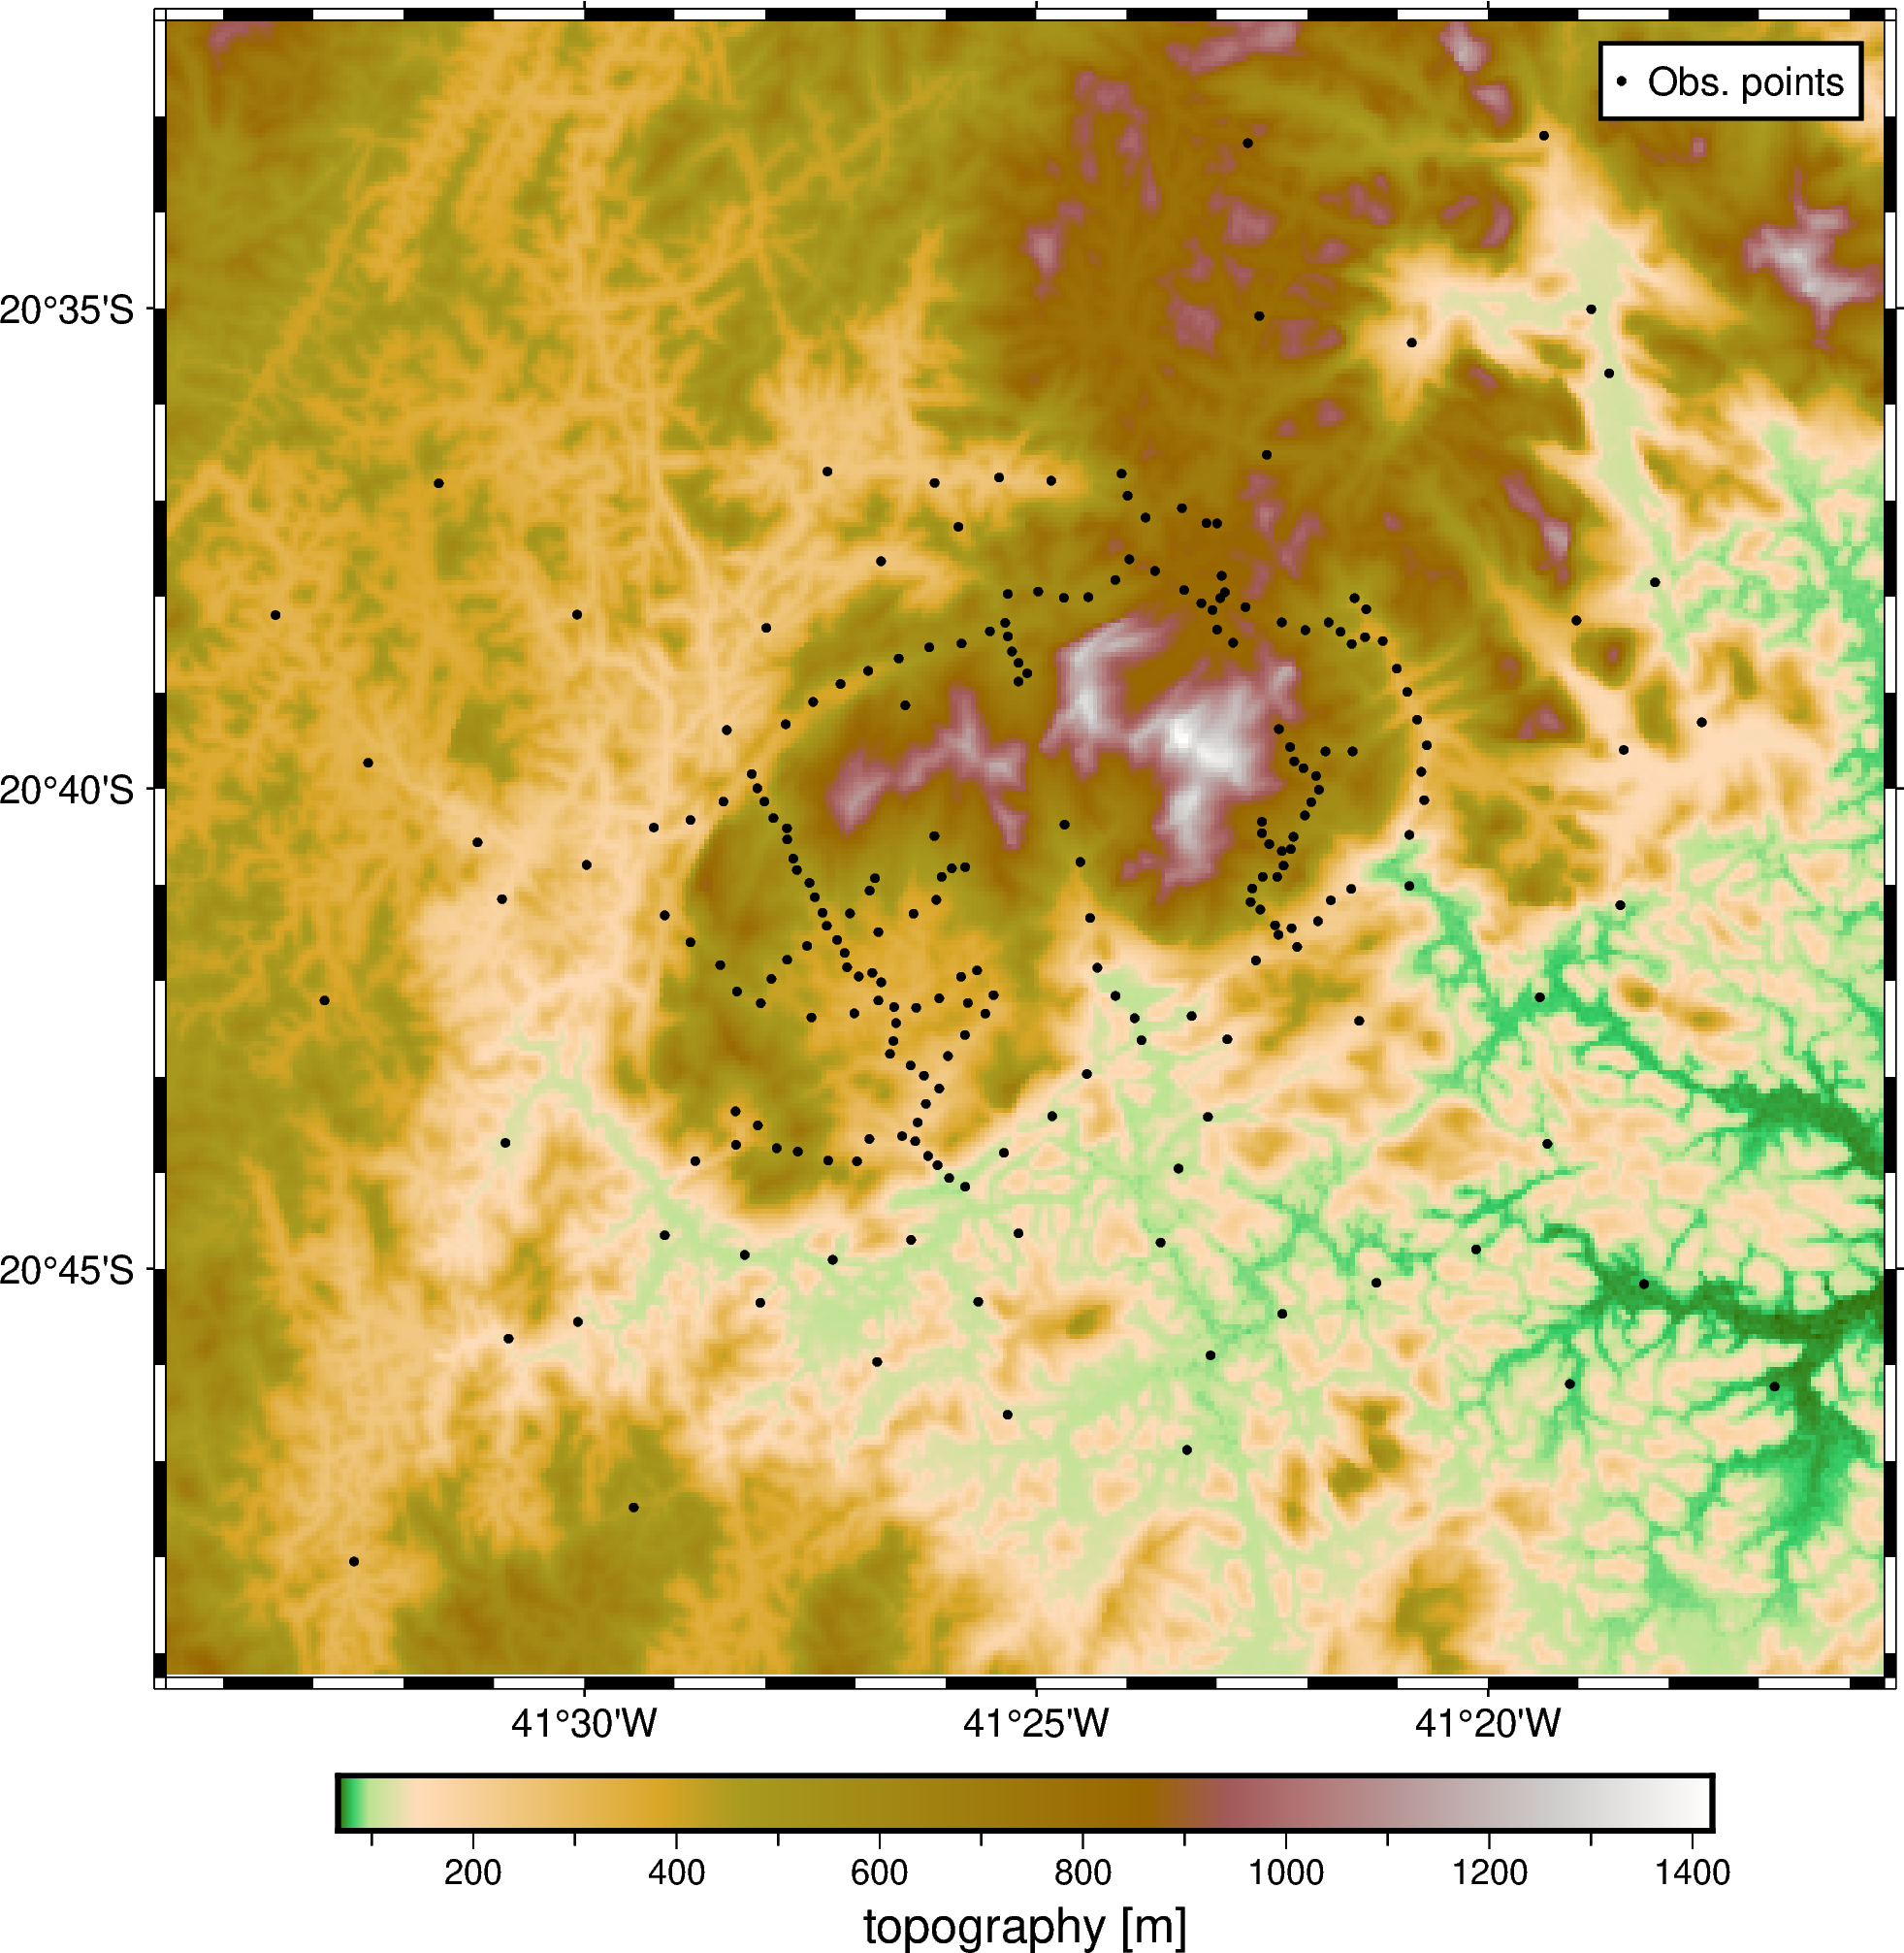

In [64]:
fig = pygmt.Figure()
fig.grdimage(topography_geometric, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
    label='Obs. points'
)
fig.legend()
fig.show(width=600)

In [16]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.scalars)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
# data
# geoid_table

## Distúrbio da gravidade

In [17]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152


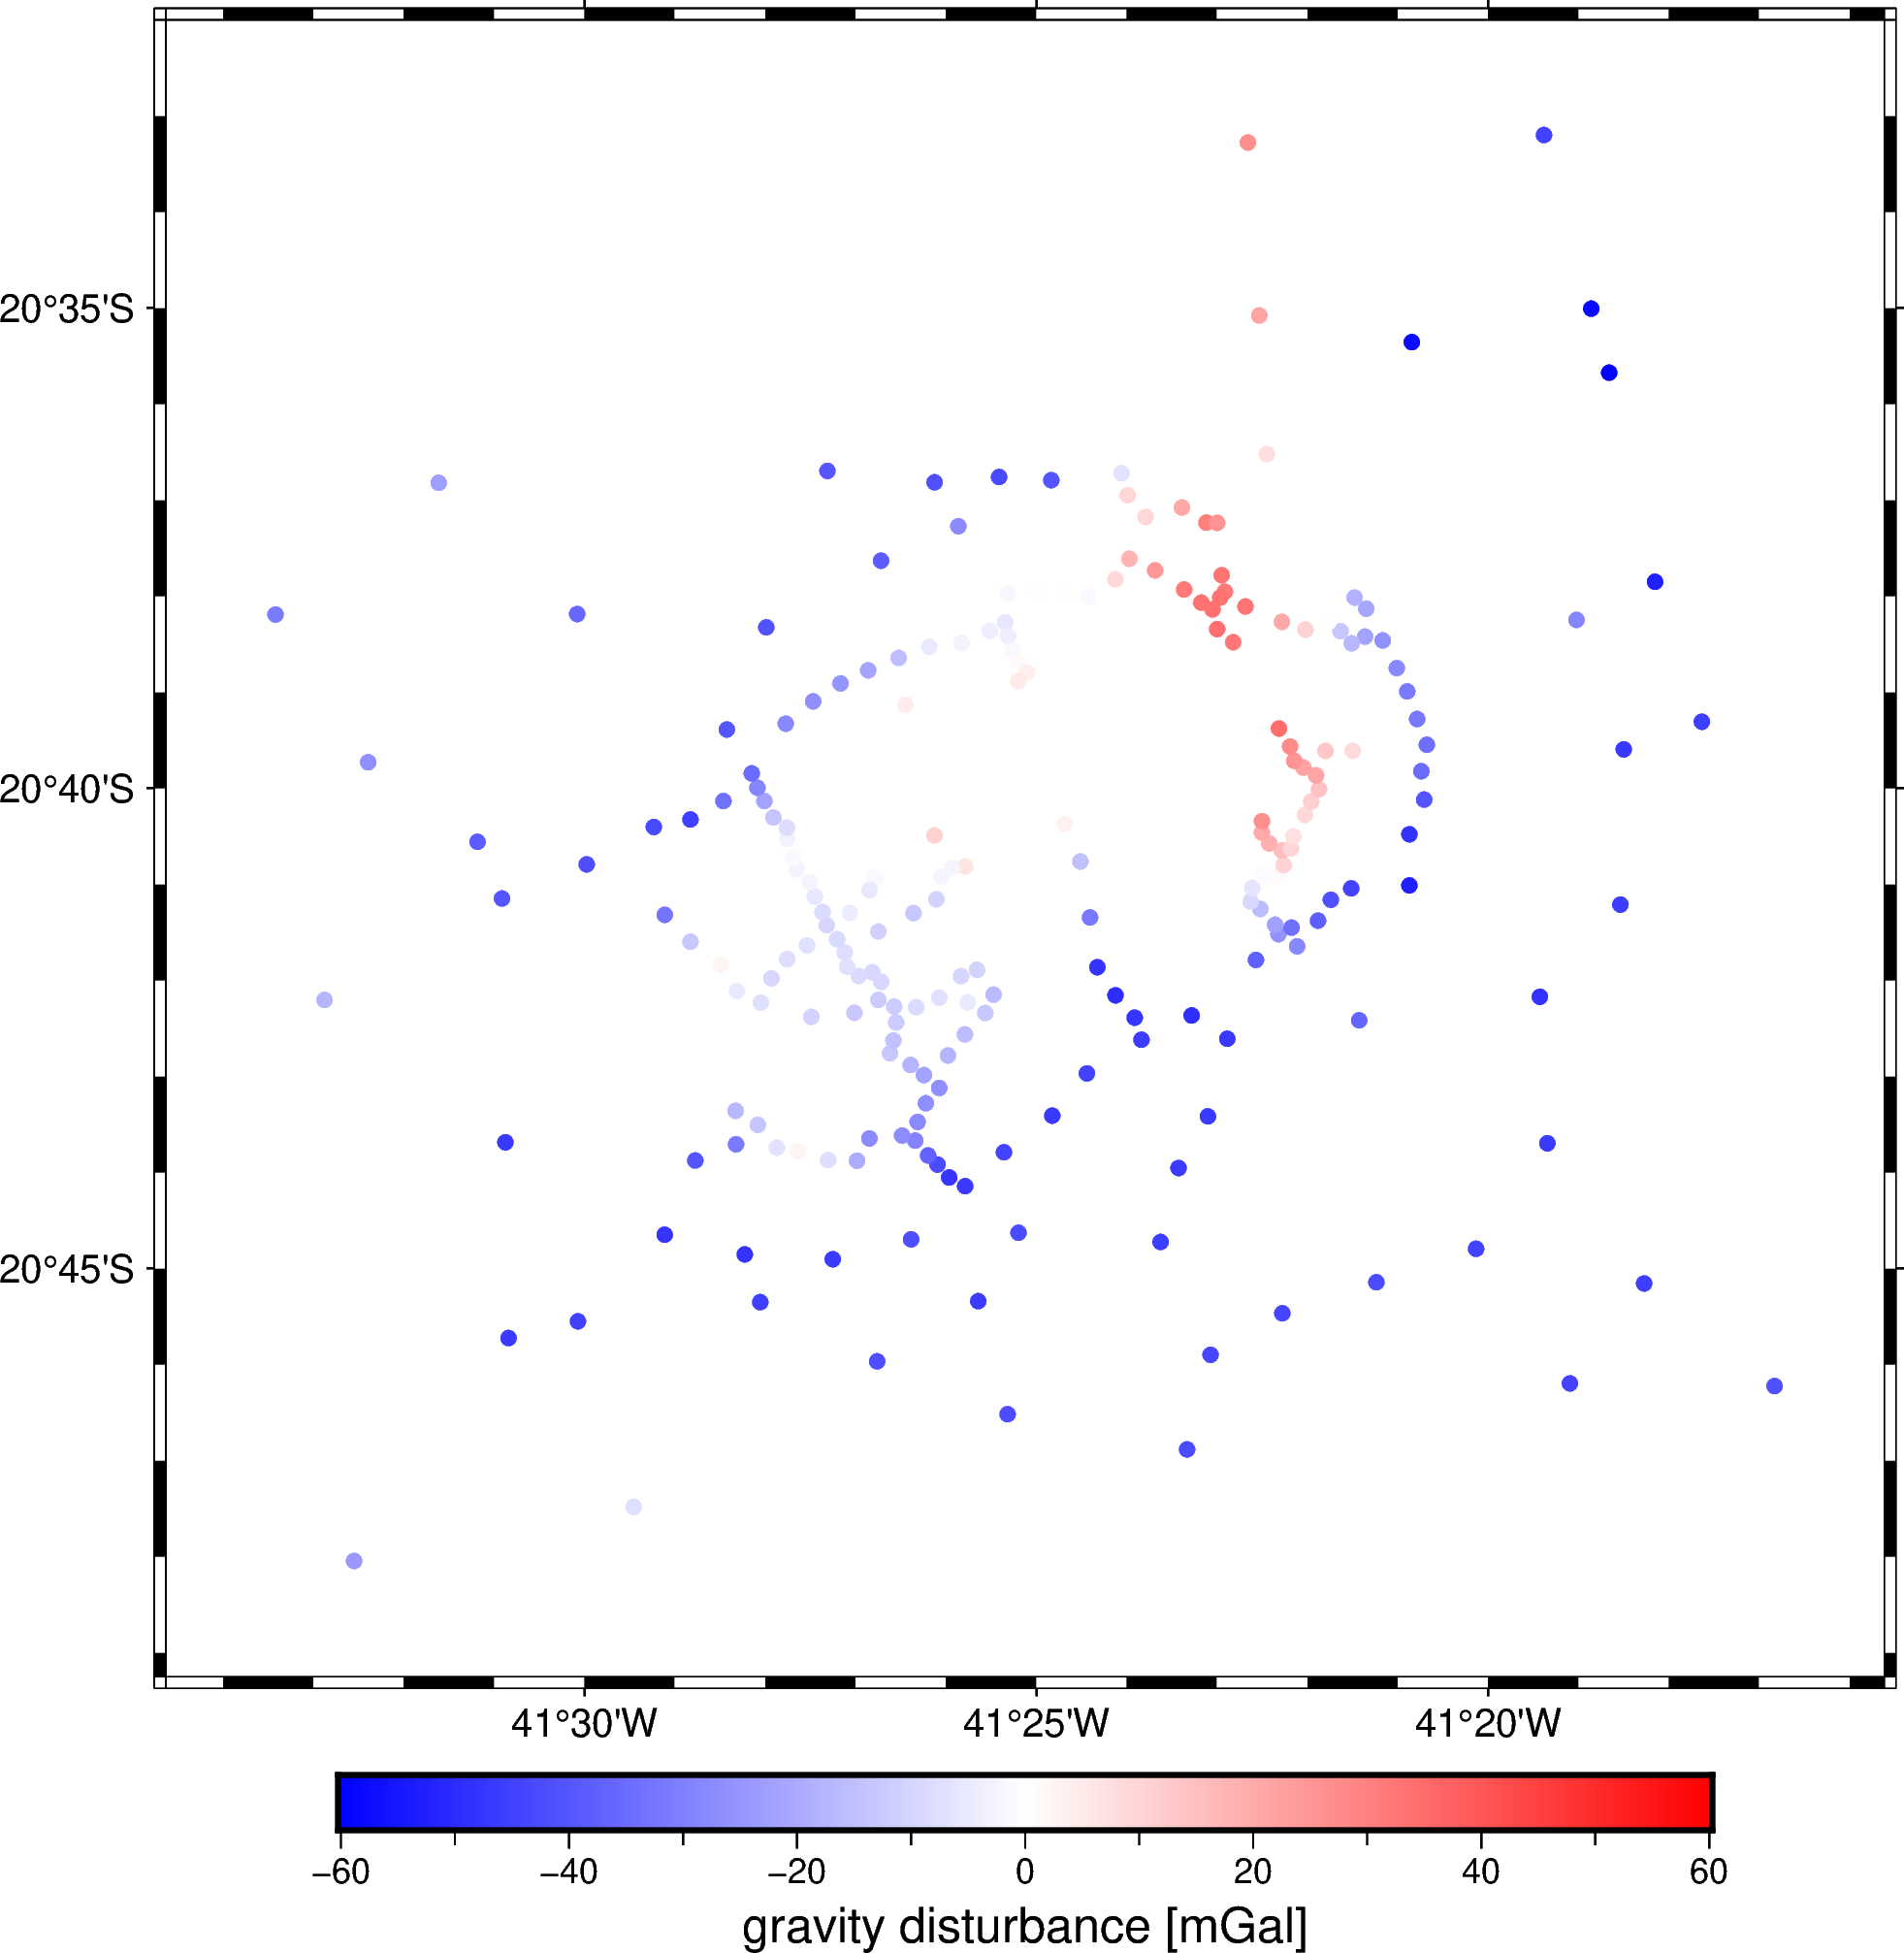

In [60]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [19]:
# projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=24, south=True)

In [20]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06


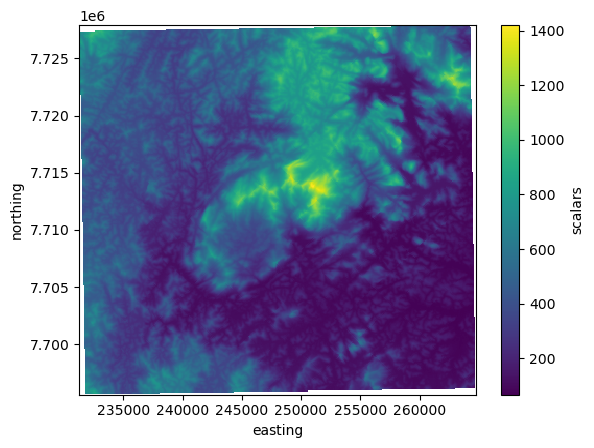

In [21]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")

# topography_proj.values = topography_geometric.values

topography_proj.plot()

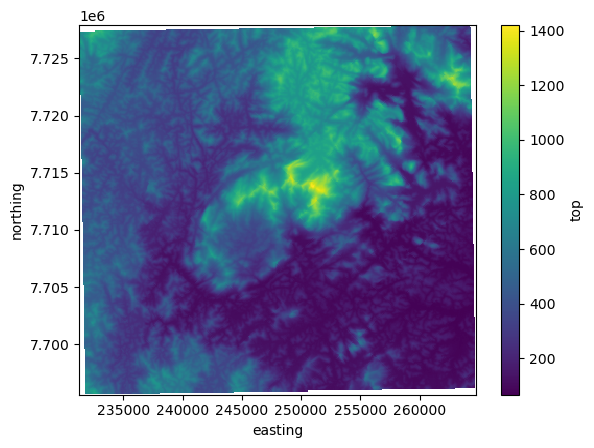

In [22]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)

topography_model.top.plot()

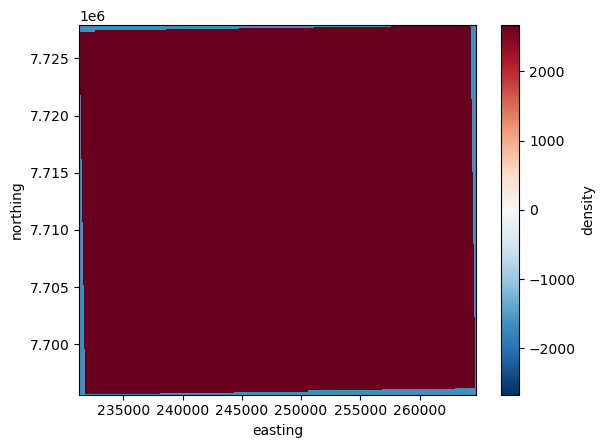

In [23]:
# fig = pygmt.Figure()
# scale = vd.maxabs(topography_model.density)
# pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
# fig.grdimage(topography_model.density, projection="X15c/15c", frame=True)
# fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
# fig.show()

topography_model.density.plot()

In [24]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [25]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m,gravity_bouguer_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06,-55.450275
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06,-56.916306
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06,-57.852281
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06,-54.531304
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06,-52.116174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06,-62.128658
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06,-59.352172
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06,-60.236340
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06,-52.723844


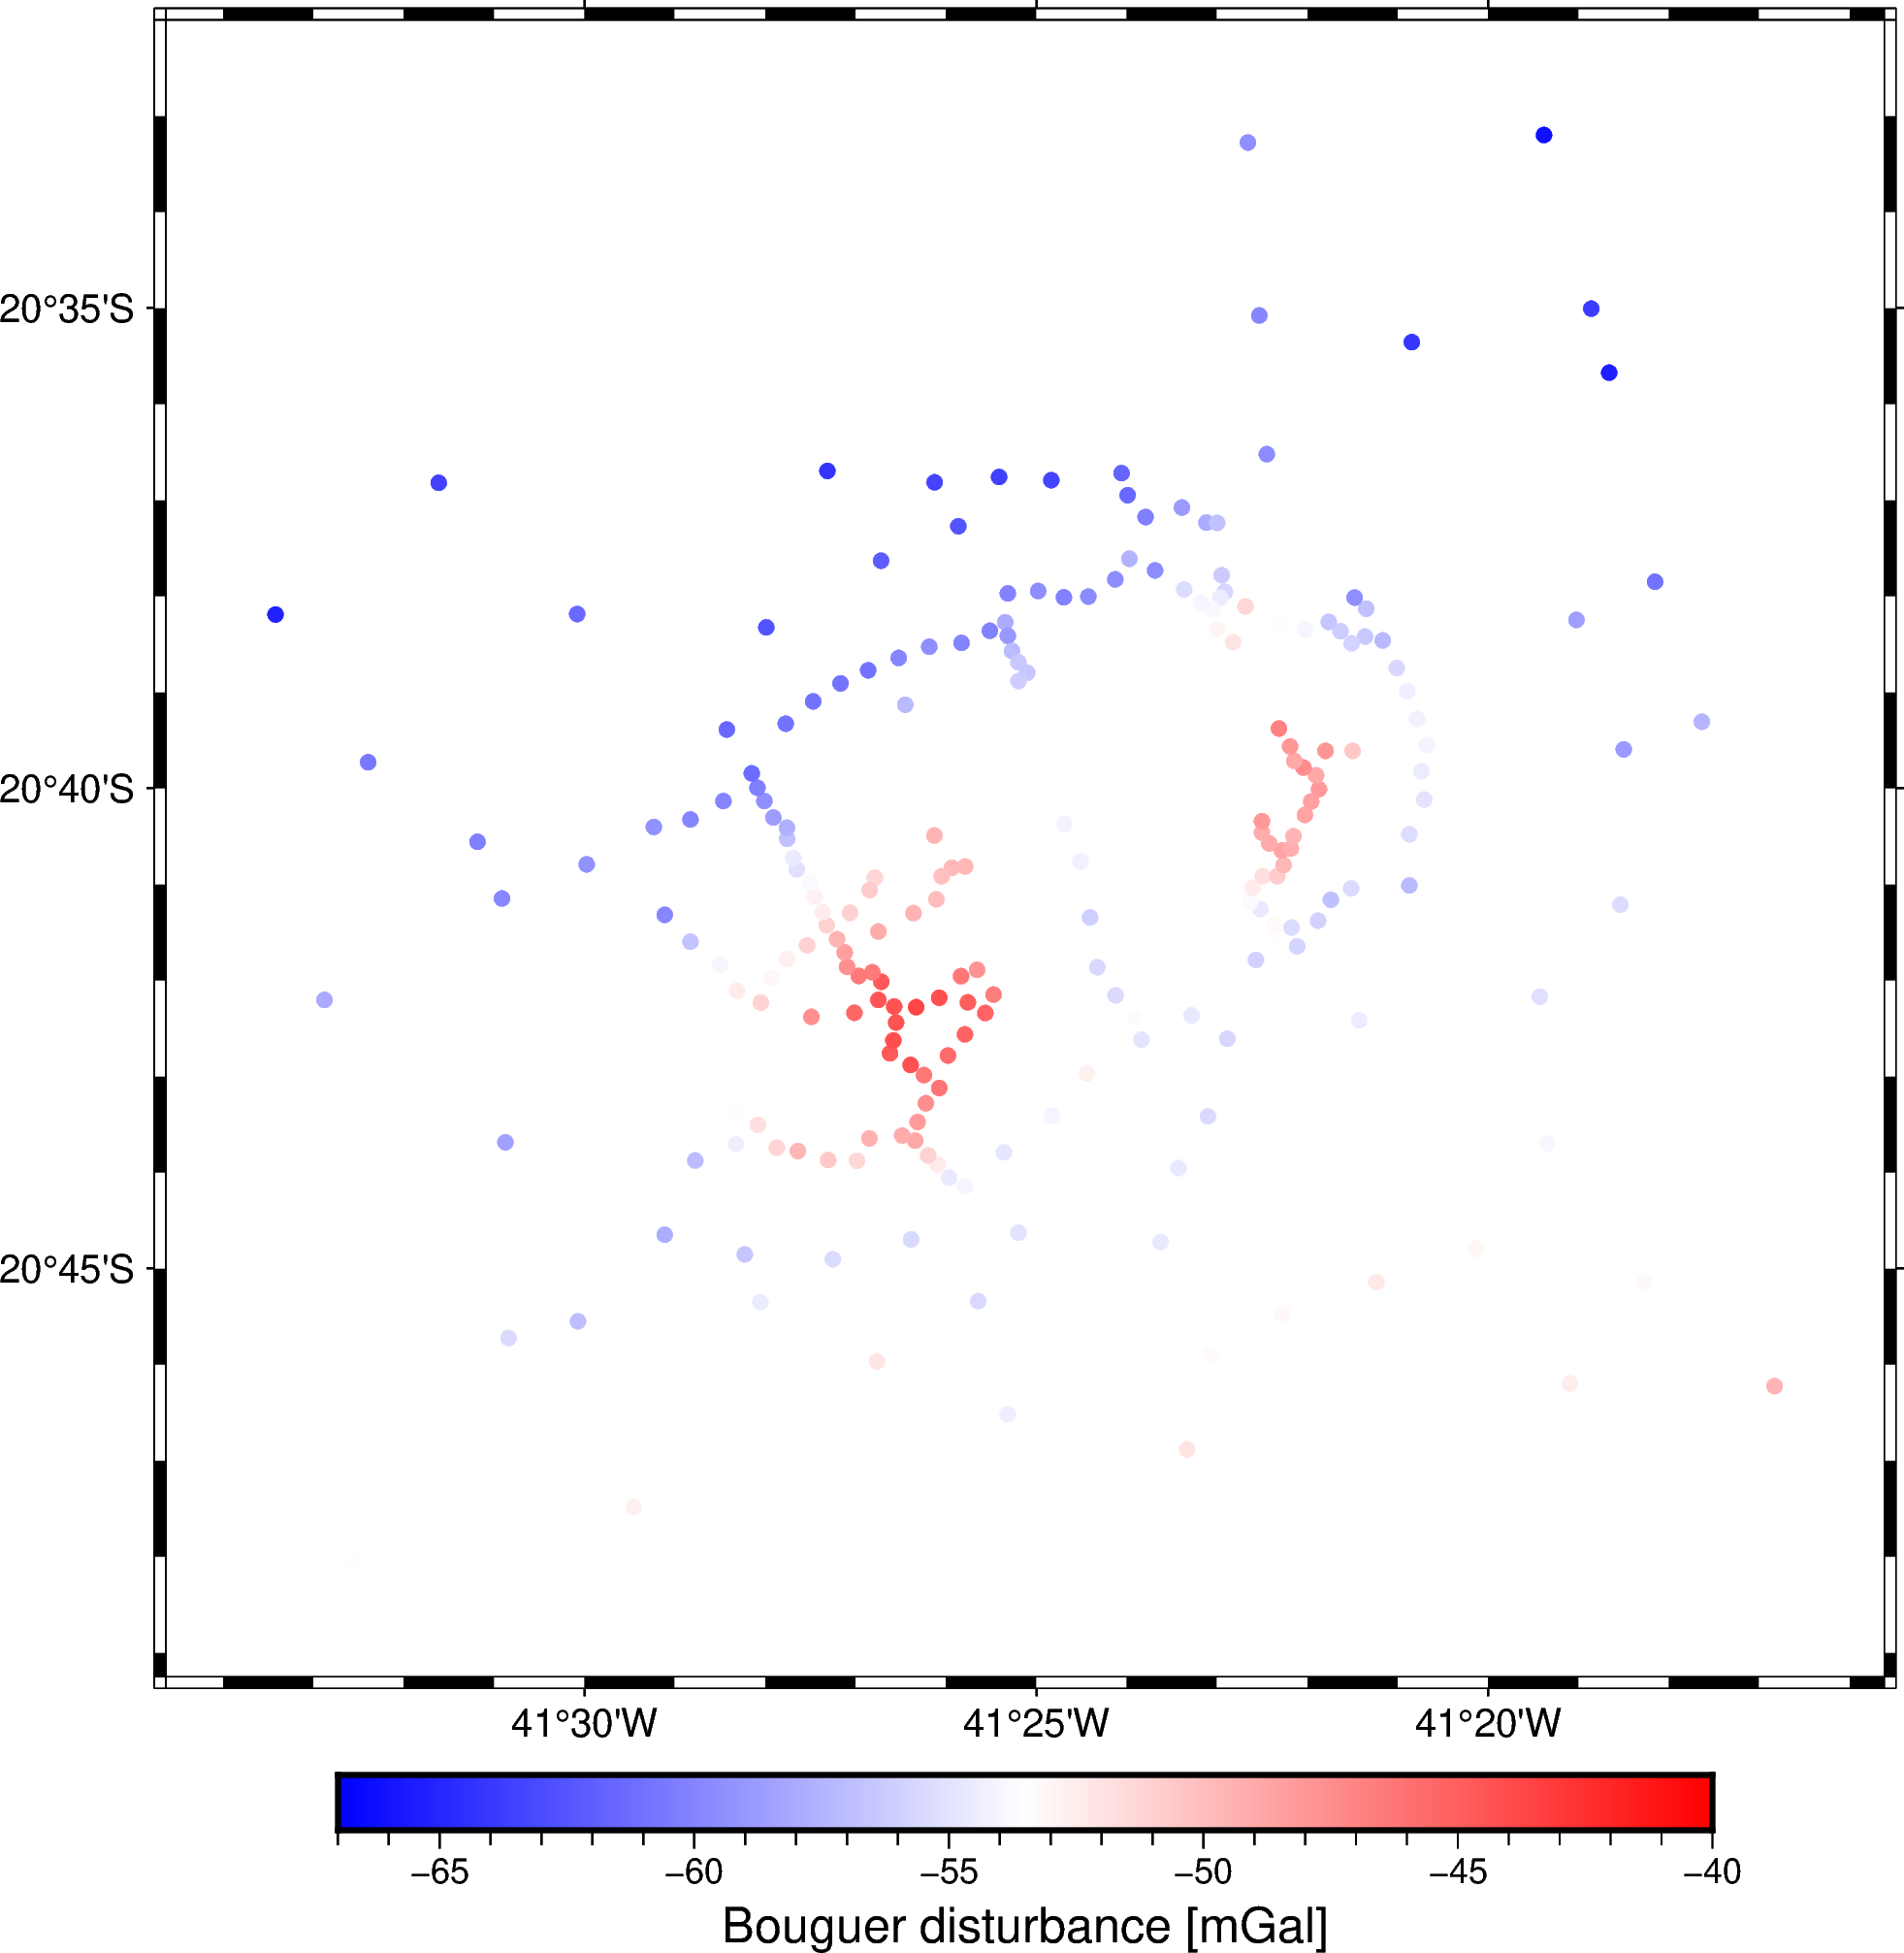

In [26]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-67, -40])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [48]:
regional = vd.Trend(degree=1).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,...,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m,gravity_bouguer_mgal,regional_mgal,residual_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,...,03122019_996,-5.6,142.34,978637.755893,-46.349288,238246.104213,7.702141e+06,-55.450275,-50.734278,-4.715997
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,...,03122019_996,-5.6,146.46,978636.310346,-44.864570,239573.565308,7.702483e+06,-56.916306,-50.703081,-6.213225
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,...,03122019_996,-5.6,111.70,978646.141191,-47.667672,241216.748956,7.704176e+06,-57.852281,-51.404064,-6.448218
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,...,03122019_996,-5.6,123.50,978643.198869,-45.388990,243071.287960,7.702906e+06,-54.531304,-50.341706,-4.189598
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,...,03122019_996,-5.6,124.41,978643.532181,-41.786546,245332.547009,7.701803e+06,-52.116174,-49.305531,-2.810644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,...,16122019_996,-5.6,259.34,978593.592668,-38.414026,245174.133206,7.717189e+06,-62.128658,-58.301461,-3.827197
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,...,17122019_965,-5.6,198.51,978615.508625,-41.776541,239604.189759,7.711266e+06,-59.352172,-55.817540,-3.534632
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,...,17122019_965,-5.6,221.13,978608.293091,-38.846680,237502.245723,7.711667e+06,-60.236340,-56.416191,-3.820149
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,...,17122019_965,-5.6,437.97,978548.250028,-7.481152,240697.890126,7.698939e+06,-52.723844,-48.442097,-4.281747


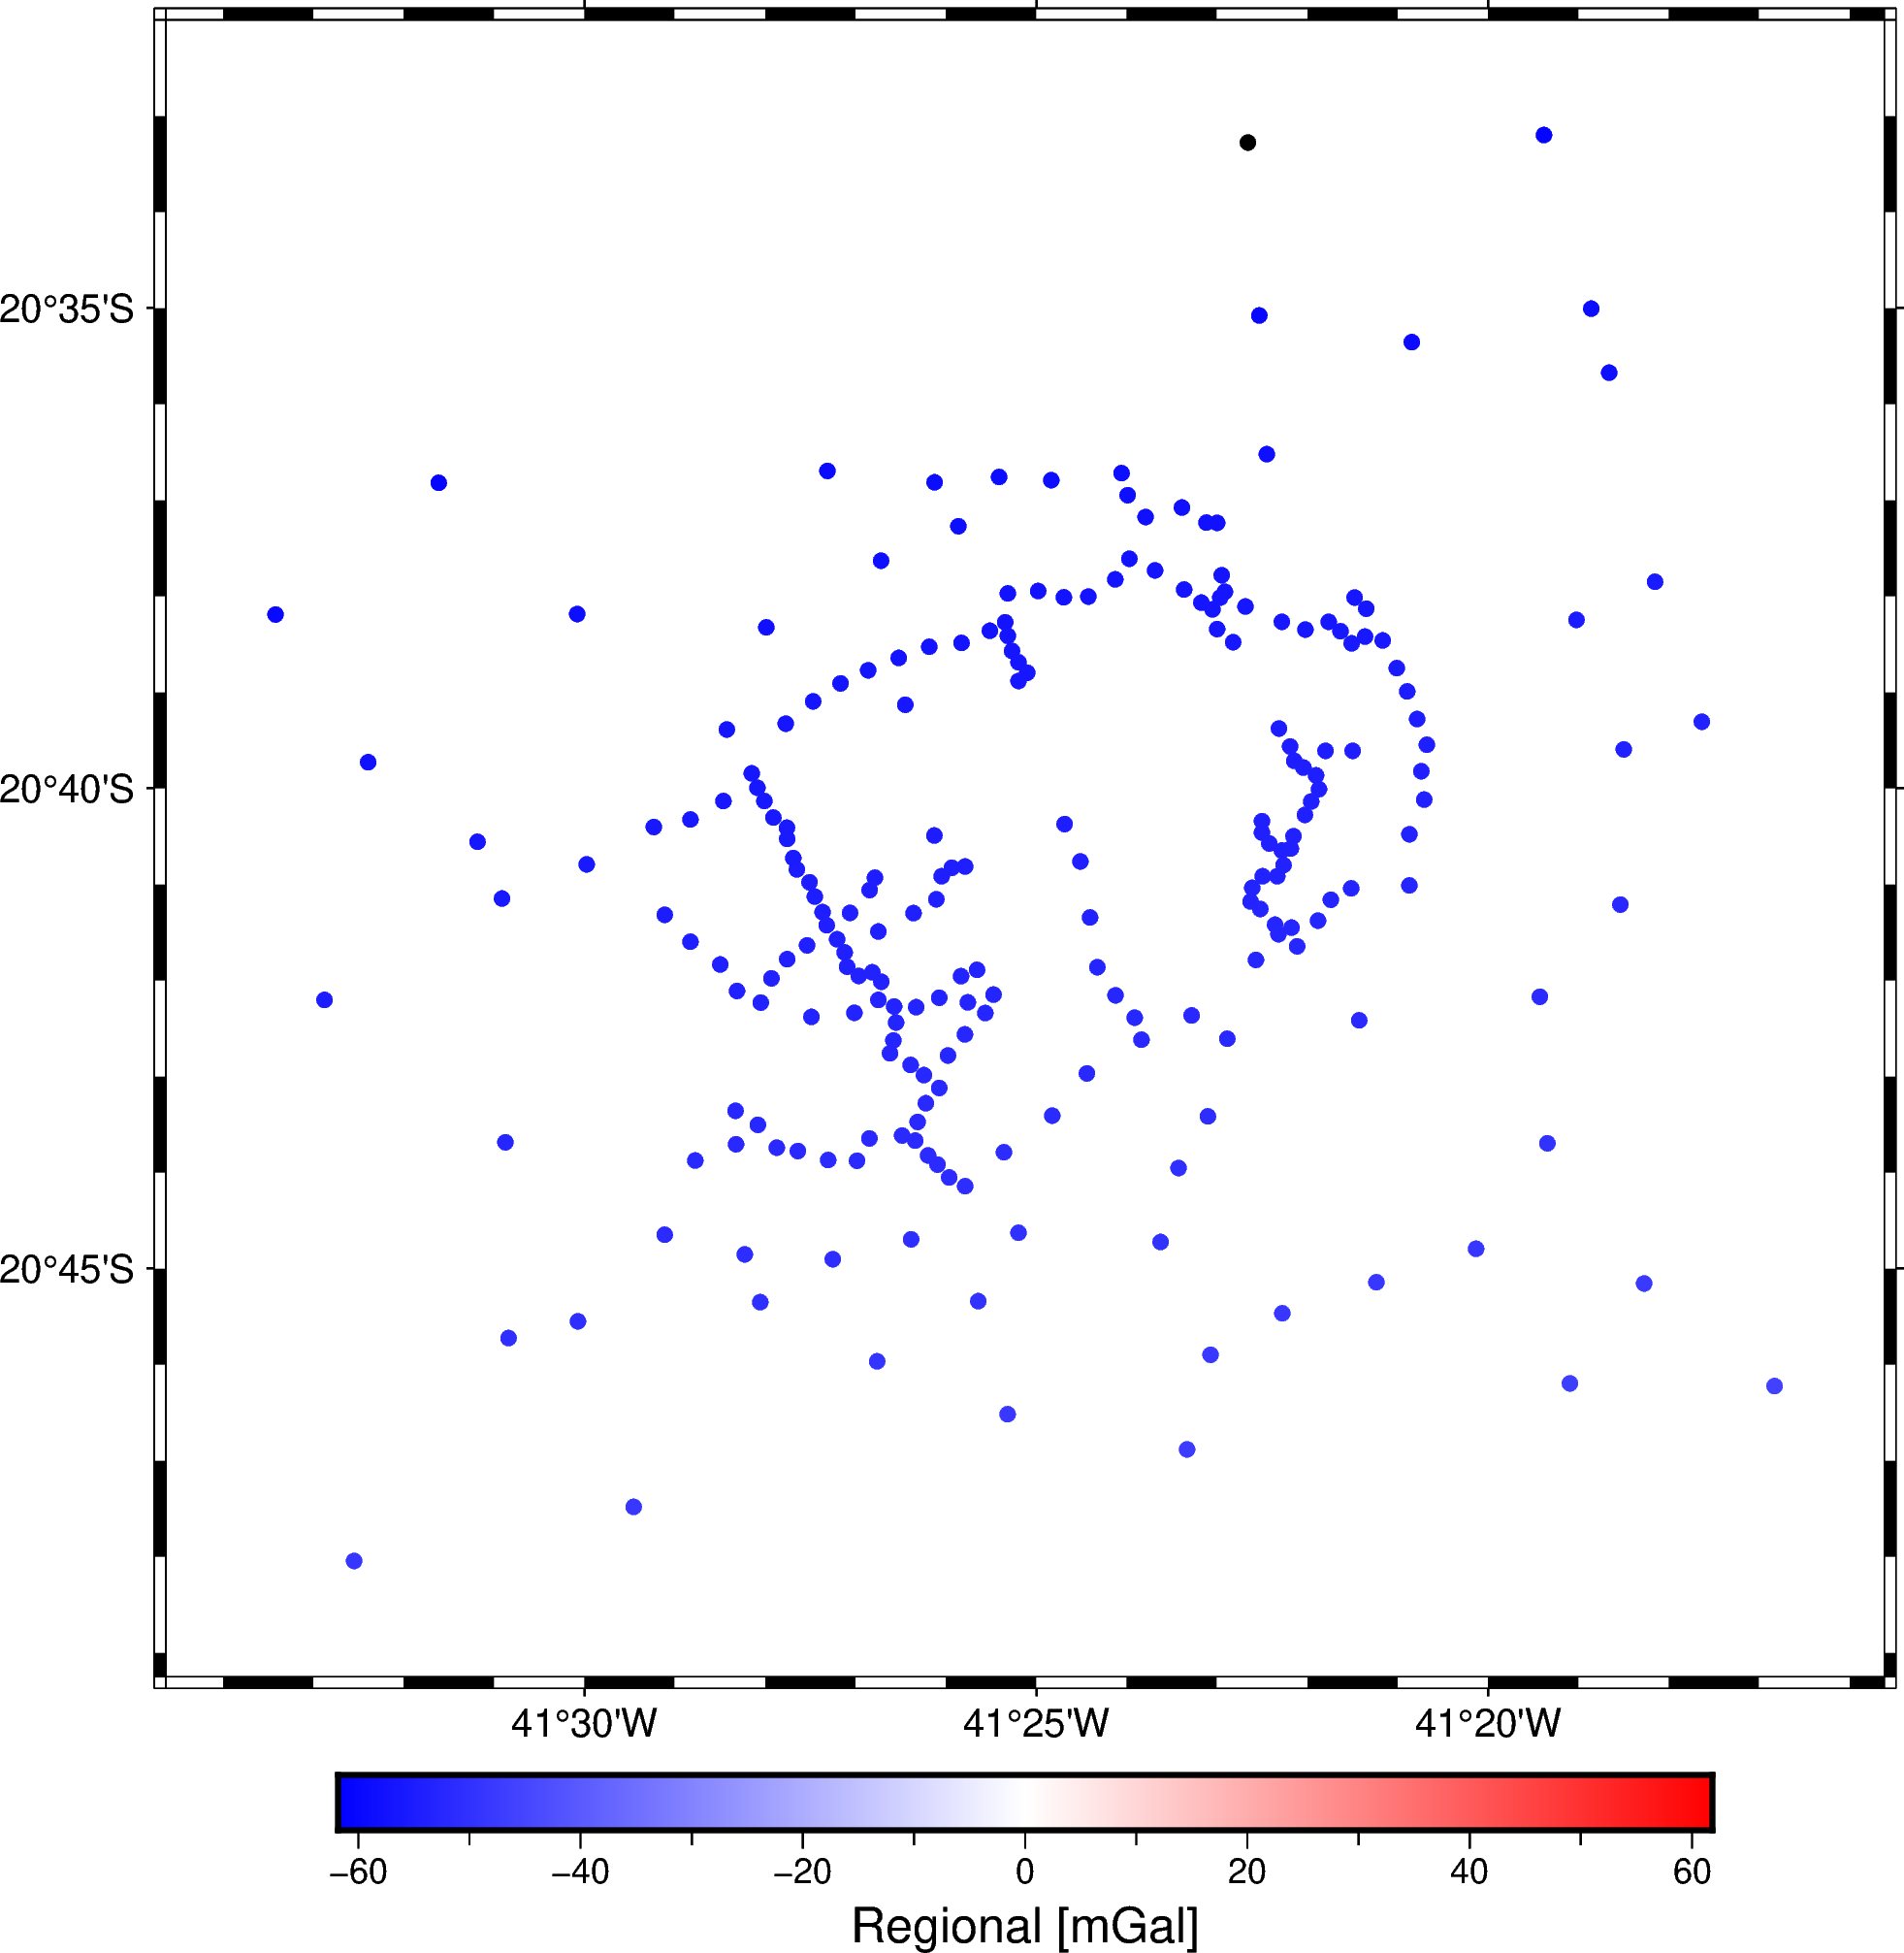

In [49]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

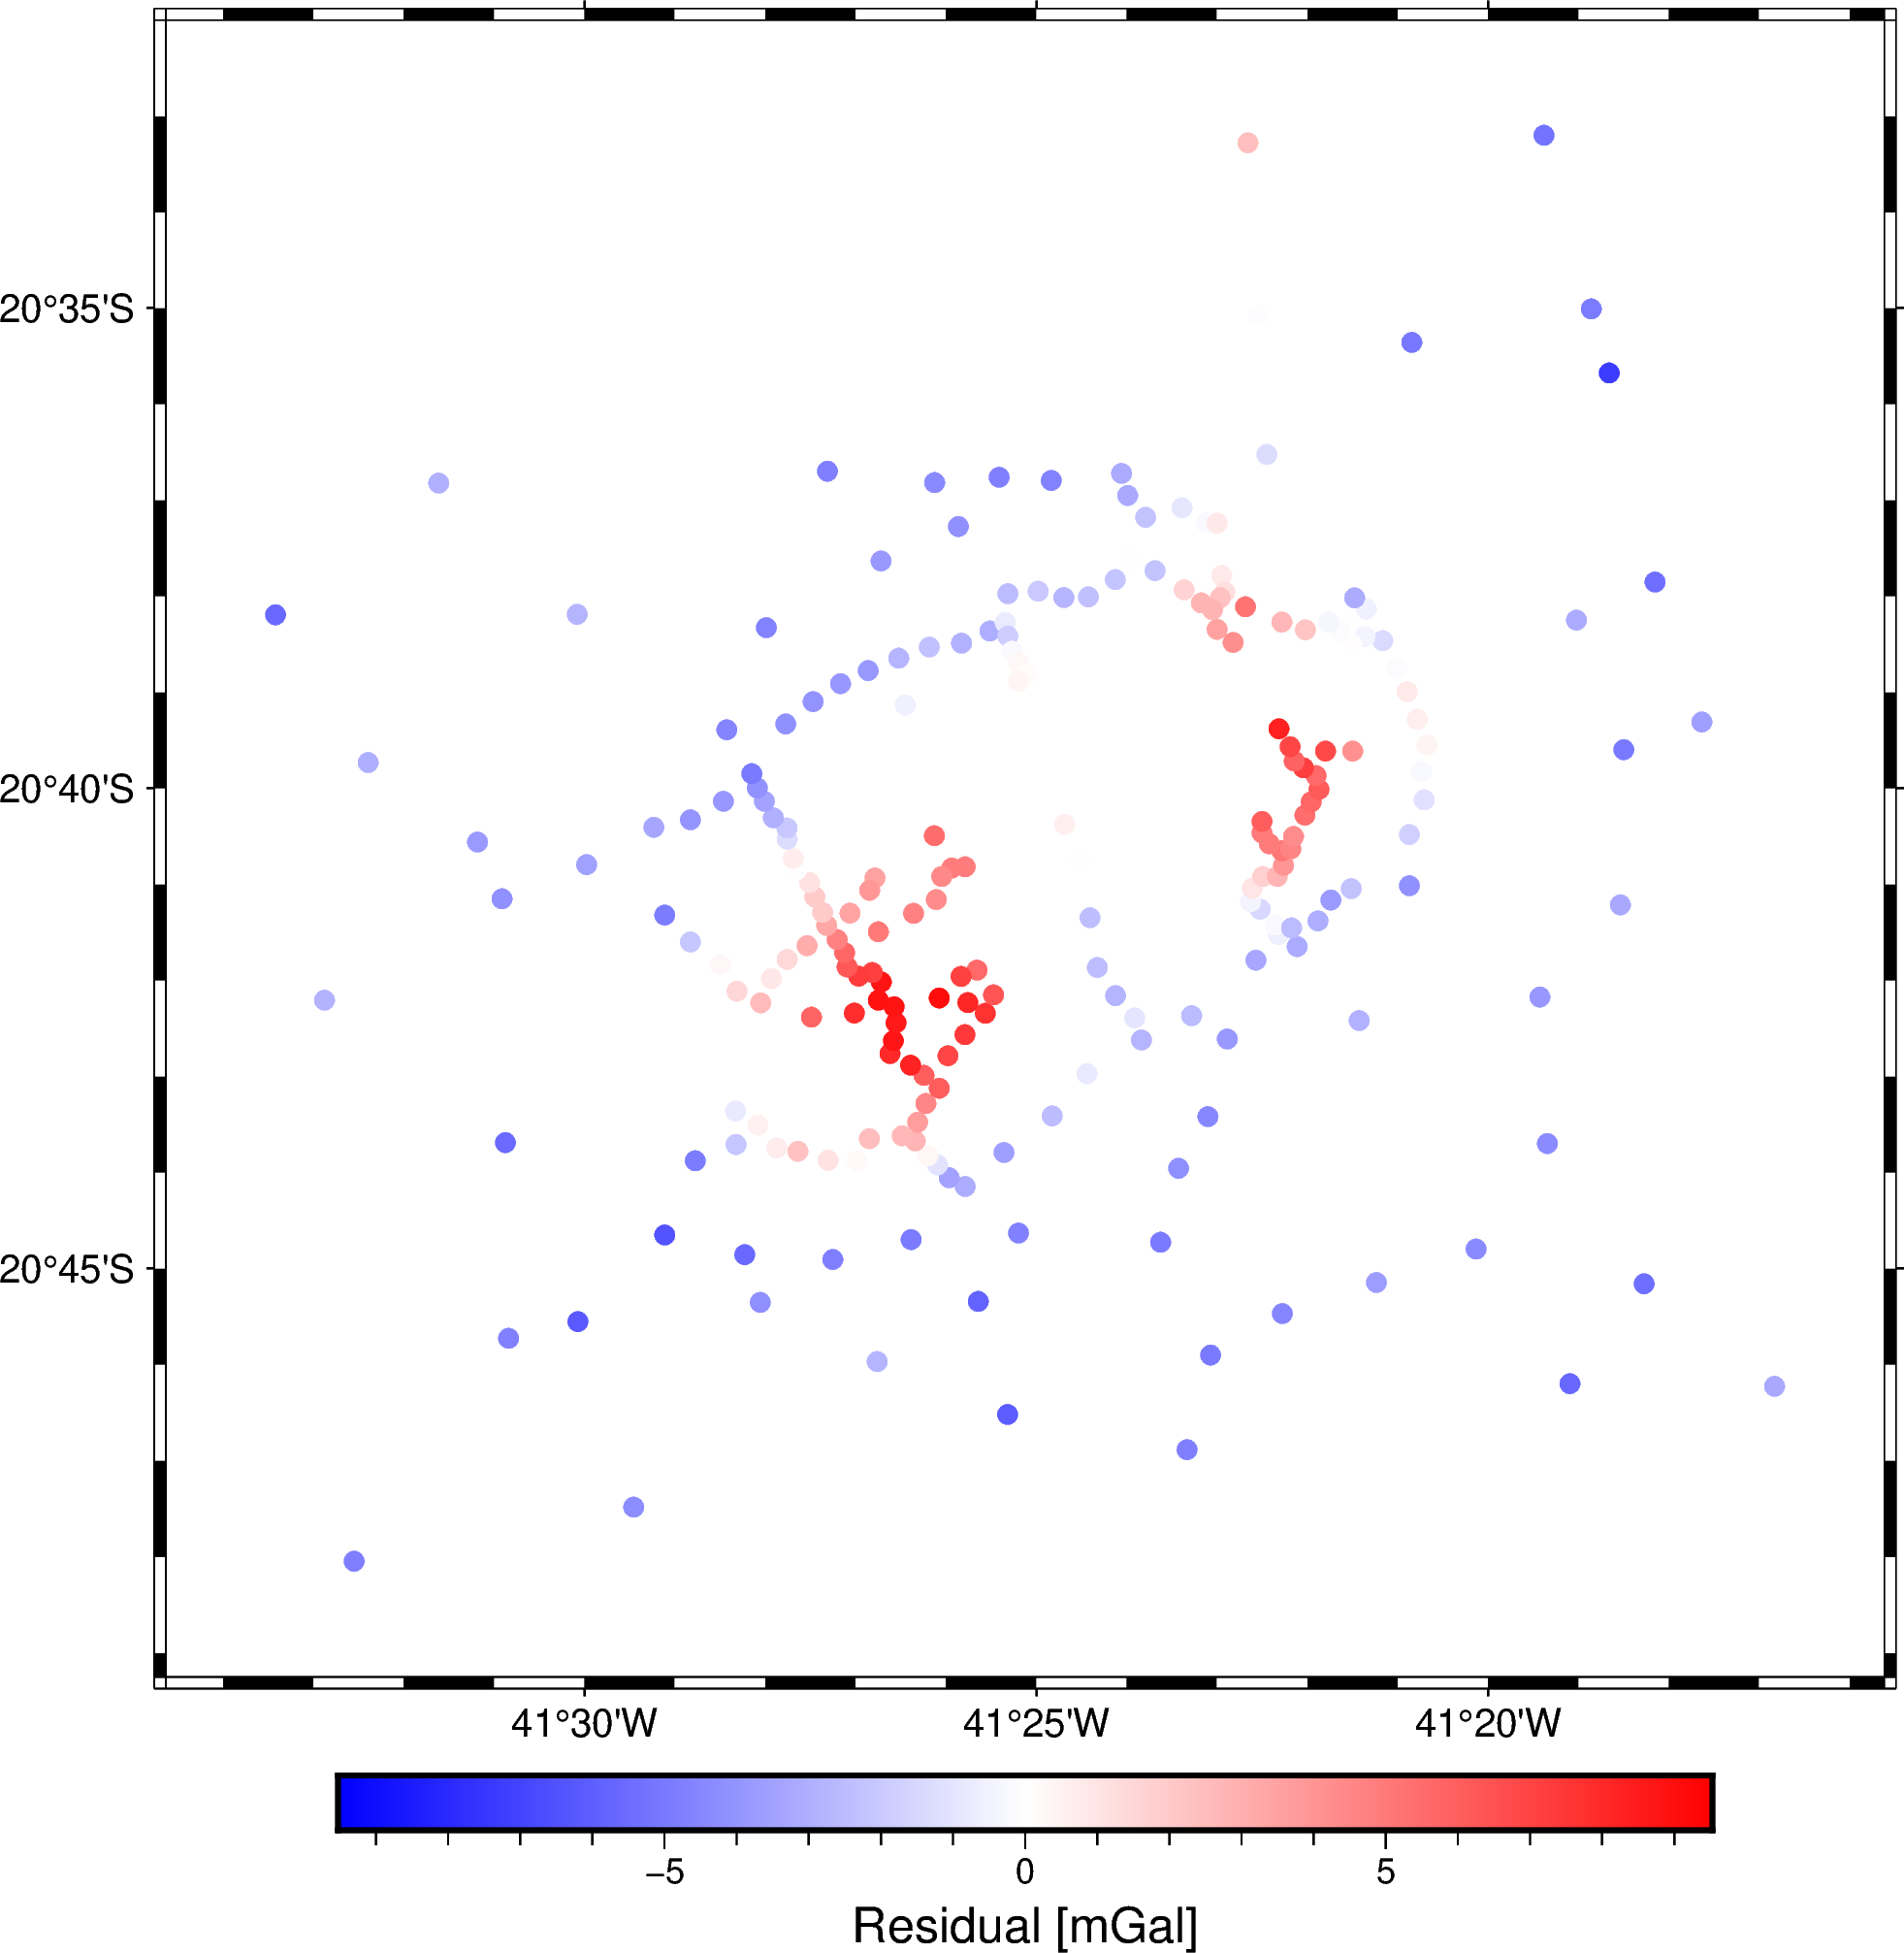

In [58]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c5p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [117]:
eqs = hm.EquivalentSources(damping=1.0, depth=2e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

EquivalentSources(damping=1.0, depth=2000.0)

In [138]:
# Interpolar extra coord a partir da topografia
grid_extra_coord = vd.grid_coordinates(region, spacing= 2 / 3600)


interpolator = vd.KNeighbors()
topography_table = vd.grid_to_table(topography)
interpolator.fit((topography_table.longitude, topography_table.latitude), topography_table.elevation)
extra_coord=interpolator.predict((grid_extra_coord[0], grid_extra_coord[1]))

# geoid_values = np.reshape(geoid_1.elevation, topography.shape)
coordinates_grid = ([grid_extra_coord[0], grid_extra_coord[1], extra_coord])

In [194]:
residual_grid = eqs.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.9e3),
    # coordinates=coordinates_grid,
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

<xarray.Dataset>
Dimensions:           (latitude: 447, longitude: 499)
Coordinates:
  * longitude         (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28
  * latitude          (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward            (latitude, longitude) float64 900.0 900.0 ... 900.0 900.0
Data variables:
    gravity_residual  (latitude, longitude) float64 -3.719 -3.741 ... -3.141
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

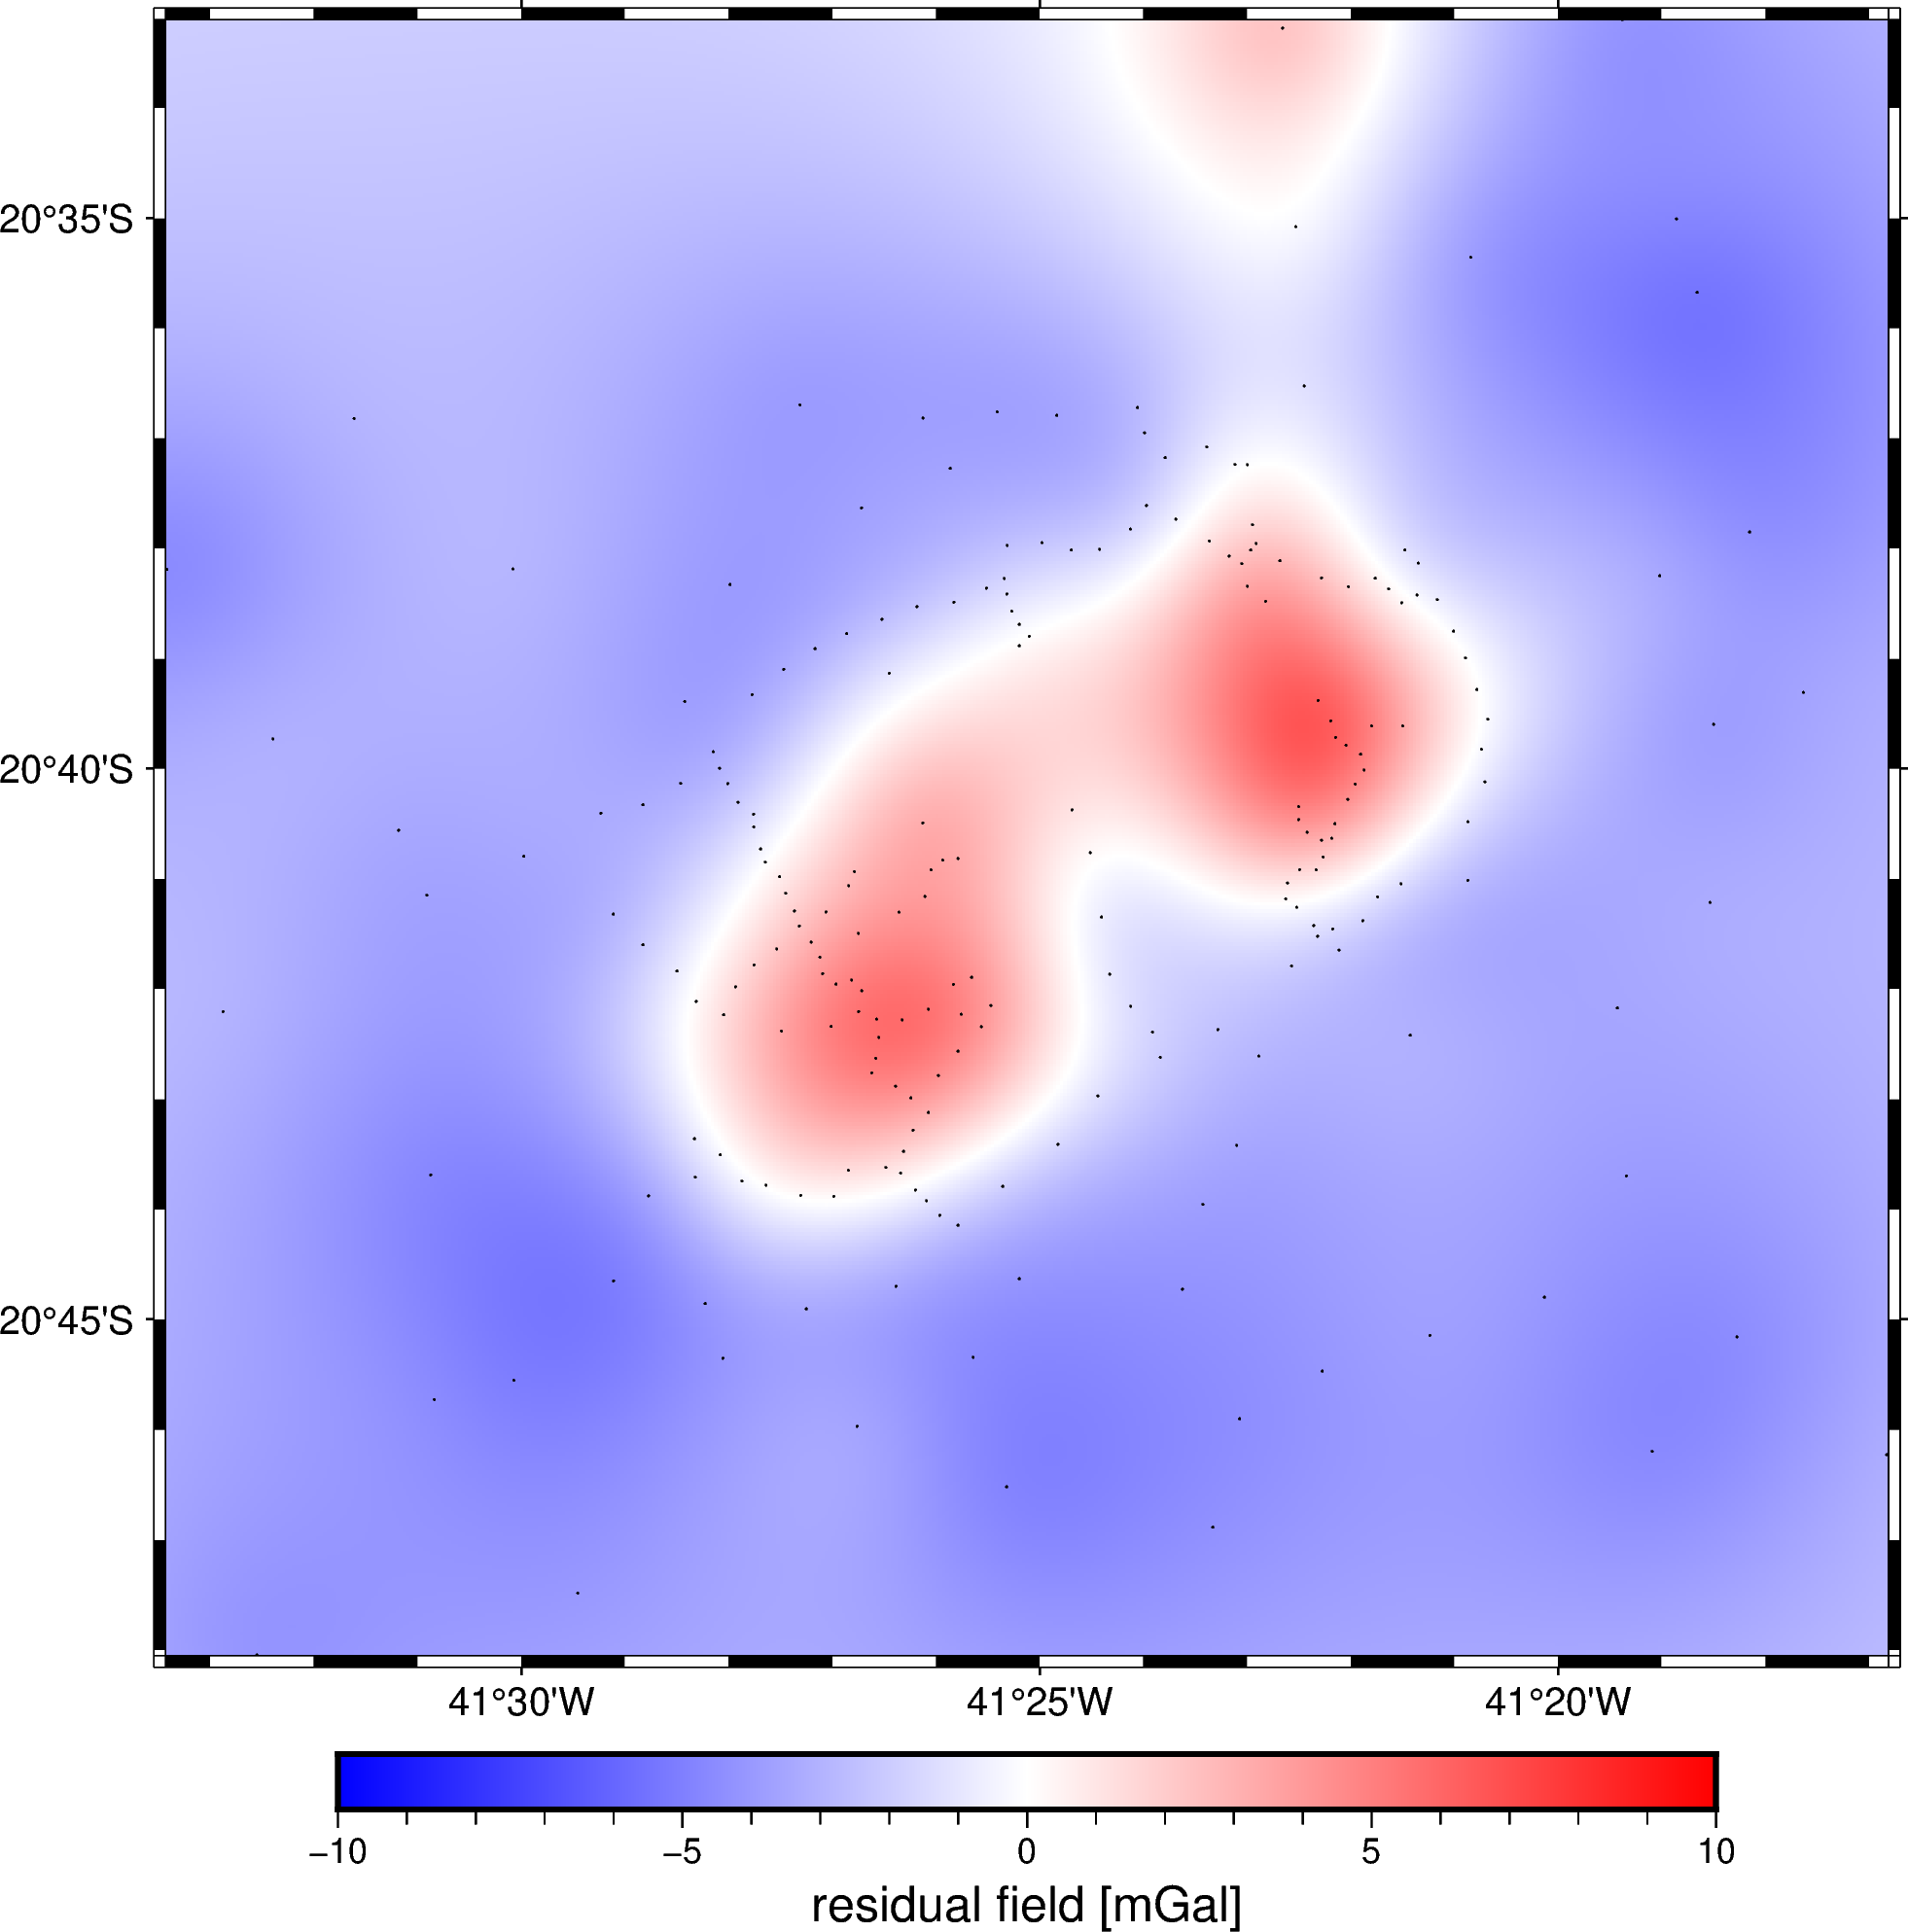

In [195]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-10, 10], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [196]:
### Validação cruzada entre dados de grav residual e camada equivalente
r2_score = np.mean(
    vd.cross_val_score(
        eqs,
        coordinates,
        data.residual_mgal,
    )
)
print(f'O R² do modelo de camada equivalente para os dados é de: {r2_score:.3f}')

O R² do modelo de camada equivalente para os dados é de: 0.934


## image
<!-- ![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg) -->

# Calculate derivatives and total gradient

In [197]:
residual_grid = residual_grid.assign(derivative_easting=hm.derivative_easting(residual_grid.gravity_residual, order=1, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_northing=hm.derivative_northing(residual_grid.gravity_residual, order=1, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_upward=hm.derivative_upward(residual_grid.gravity_residual, order=1))

residual_grid = residual_grid.assign(TG=np.sqrt(residual_grid.derivative_easting**2  +
                                                residual_grid.derivative_northing**2 +
                                                residual_grid.derivative_northing**2
                                               ))

In [198]:
residual_grid

<xarray.Dataset>
Dimensions:              (latitude: 447, longitude: 499)
Coordinates:
  * longitude            (longitude) float64 -41.56 -41.56 ... -41.28 -41.28
  * latitude             (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward               (latitude, longitude) float64 900.0 900.0 ... 900.0
Data variables:
    gravity_residual     (latitude, longitude) float64 -3.719 -3.741 ... -3.141
    derivative_easting   (latitude, longitude) float64 -39.71 -39.58 ... 26.82
    derivative_northing  (latitude, longitude) float64 -8.754 -8.826 ... 22.5
    derivative_upward    (latitude, longitude) float64 -3.084e+03 ... -1.445e+03
    TG                   (latitude, longitude) float64 41.59 41.51 ... 41.61
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

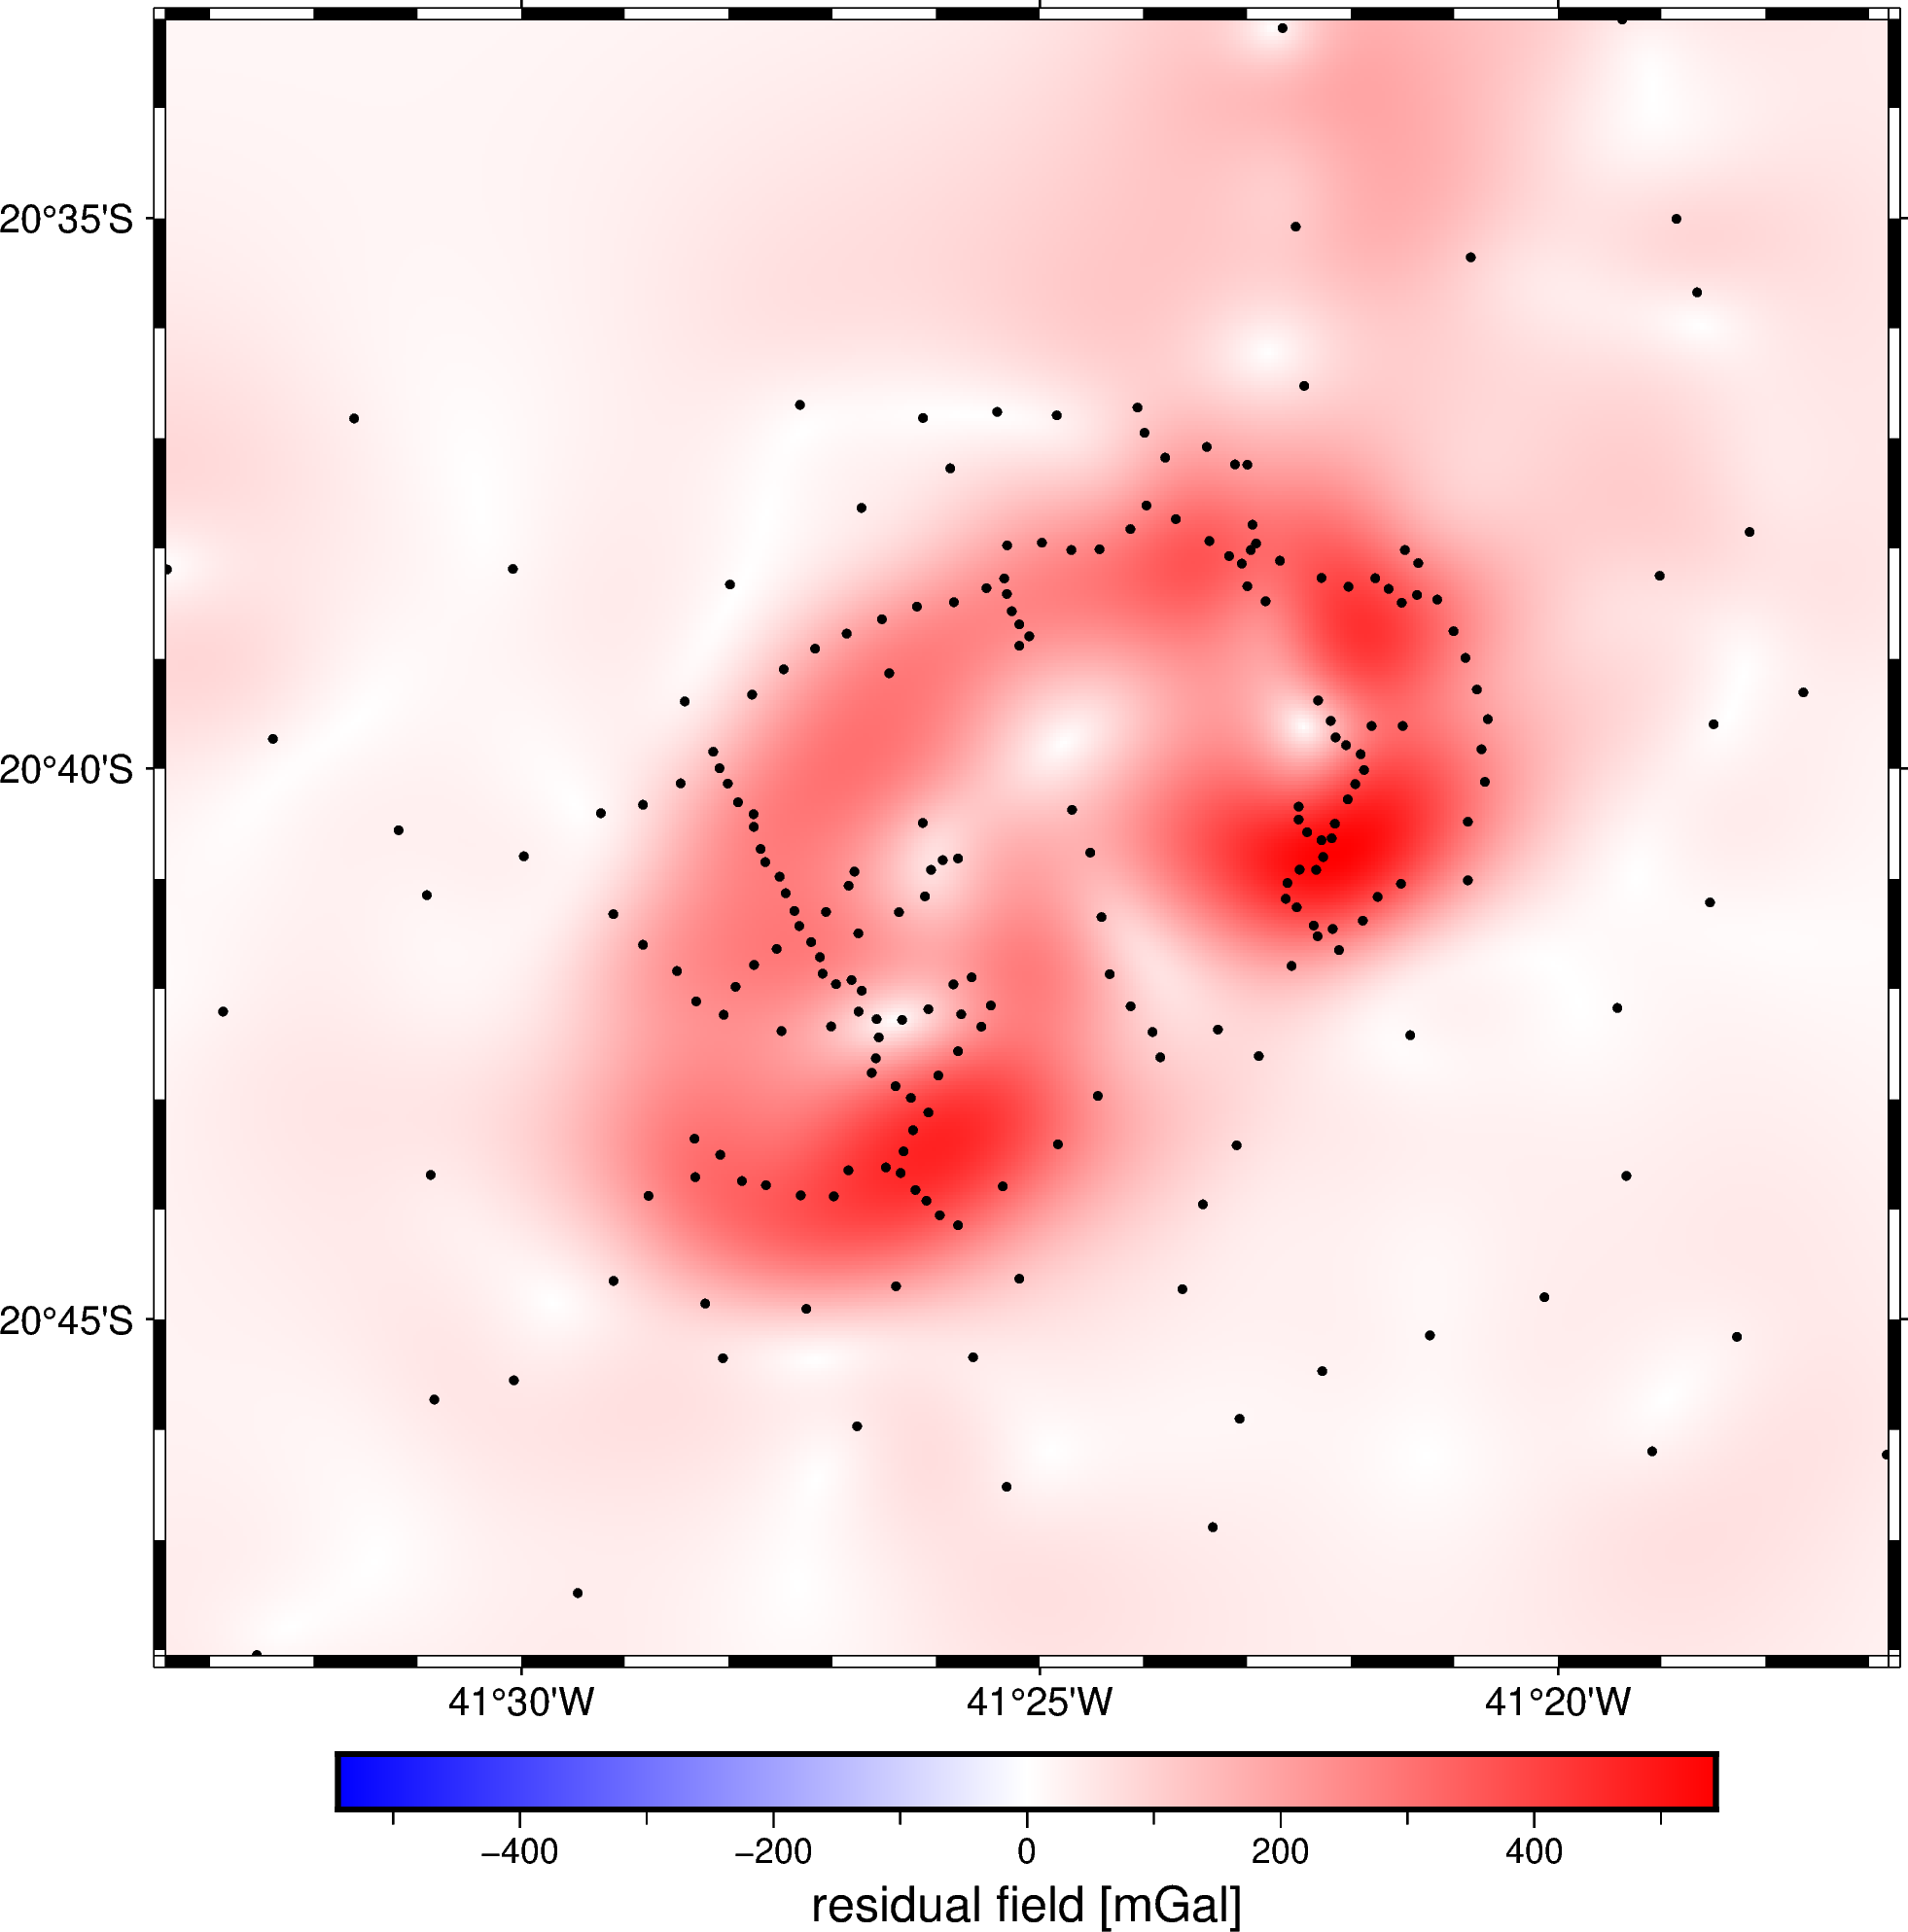

In [199]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.TG)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.TG,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
)
fig.show()

In [200]:
def matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j):
    gamma = 6.67e-11 # constante de gravitação universal, mudei o nome para não confundir com a matriz G
    cte   = 2*np.pi*gamma *10**5 # convertitido para mGal
    G = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gz = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    
    
    for j in range(len(x_j)):
        for i in range(len(x_i)):
            
            delta_x = x_i[i] - x_j[j]
            delta_y = y_i[i] - y_j[j]
            delta_z = z_i[i] - z_j[j]
            r2 = delta_x**2 + delta_y**2 + delta_z**2

            # cada ponto obs tem q considerar o efeito de cada túnel
            gz_i_j = cte*(delta_z/r2)
            gzz_i_j = cte*(1/r2-2*delta_z/r2**2) 
            
            G[i,j]  = gz_i_j  
            Gz[i,j] = gzz_i_j
            
    return G, Gz
    
    


def eq_la_bzz(data, grid, extra_coord=0):
    x_i, y_i, z_i = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values
    # x_j, y_j = grid[0].ravel(), grid[1].ravel()
    # z_j = x_j*0 + extra_coord

    x_j, y_j, z_j = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values*0+extra_coord

    G, Gz = matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j)
    
    Gz_transpose = Gz.T
    m = (np.linalg.inv(Gz_transpose@Gz))@(Gz_transpose@data.gravity_bouguer_mgal)

    predicted_high_freq = G@m

    return predicted_high_freq


In [201]:
easting_grid, northing_grid = projection(coordinates_grid[0], coordinates_grid[1])
grid = [easting_grid, northing_grid]
teste = eq_la_bzz(data, grid, extra_coord=1000)

In [202]:
teste

array([47485.77651521, 48515.80587996, 51333.11694456, 47749.84261834,
       45580.63424232, 49785.72222744, 47496.19496744, 48470.79294339,
       49112.50581549, 44640.51302477, 41863.34407258, 38538.33479315,
       37561.69141131, 37147.73519976, 35886.01865382, 34792.53503168,
       32022.58736556, 30545.3273167 , 30819.63845185, 30709.11542404,
       30709.20630435, 30778.97598367, 29538.17160676, 29999.46721817,
       29649.20719584, 29293.64129283, 29656.98947463, 30241.21135764,
       30662.83657371, 30252.06022622, 28134.57602593, 27142.19681245,
       26841.58484445, 25703.38314402, 26572.92232756, 28849.23807209,
       32168.69433131, 35385.8277254 , 39184.82982779, 43189.16589506,
       39633.46058237, 47338.71648545, 48054.00326584, 48274.59928514,
       46269.40302811, 48701.39205233, 48671.98375611, 43056.00190359,
       39859.58135558, 36153.90416309, 34217.20395328, 31450.94358883,
       27373.44152163, 25324.55902354, 23535.80641222, 21293.32275374,
      

In [203]:
eqs_regional = hm.EquivalentSources(damping=1.0e-1, depth=3e3)
eqs_regional.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.gravity_bouguer_mgal)
regional_grid = eqs_regional.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.9e3),
    # coordinates=coordinates_grid,
    data_names="gravity_bouguer",
    dims=("latitude", "longitude"),
    projection=projection,
)
regional_grid

<xarray.Dataset>
Dimensions:          (latitude: 447, longitude: 499)
Coordinates:
  * longitude        (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28
  * latitude         (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward           (latitude, longitude) float64 900.0 900.0 ... 900.0 900.0
Data variables:
    gravity_bouguer  (latitude, longitude) float64 -46.78 -46.92 ... -47.15
Attributes:
    metadata:  Generated by EquivalentSources(damping=0.1, depth=3000.0)

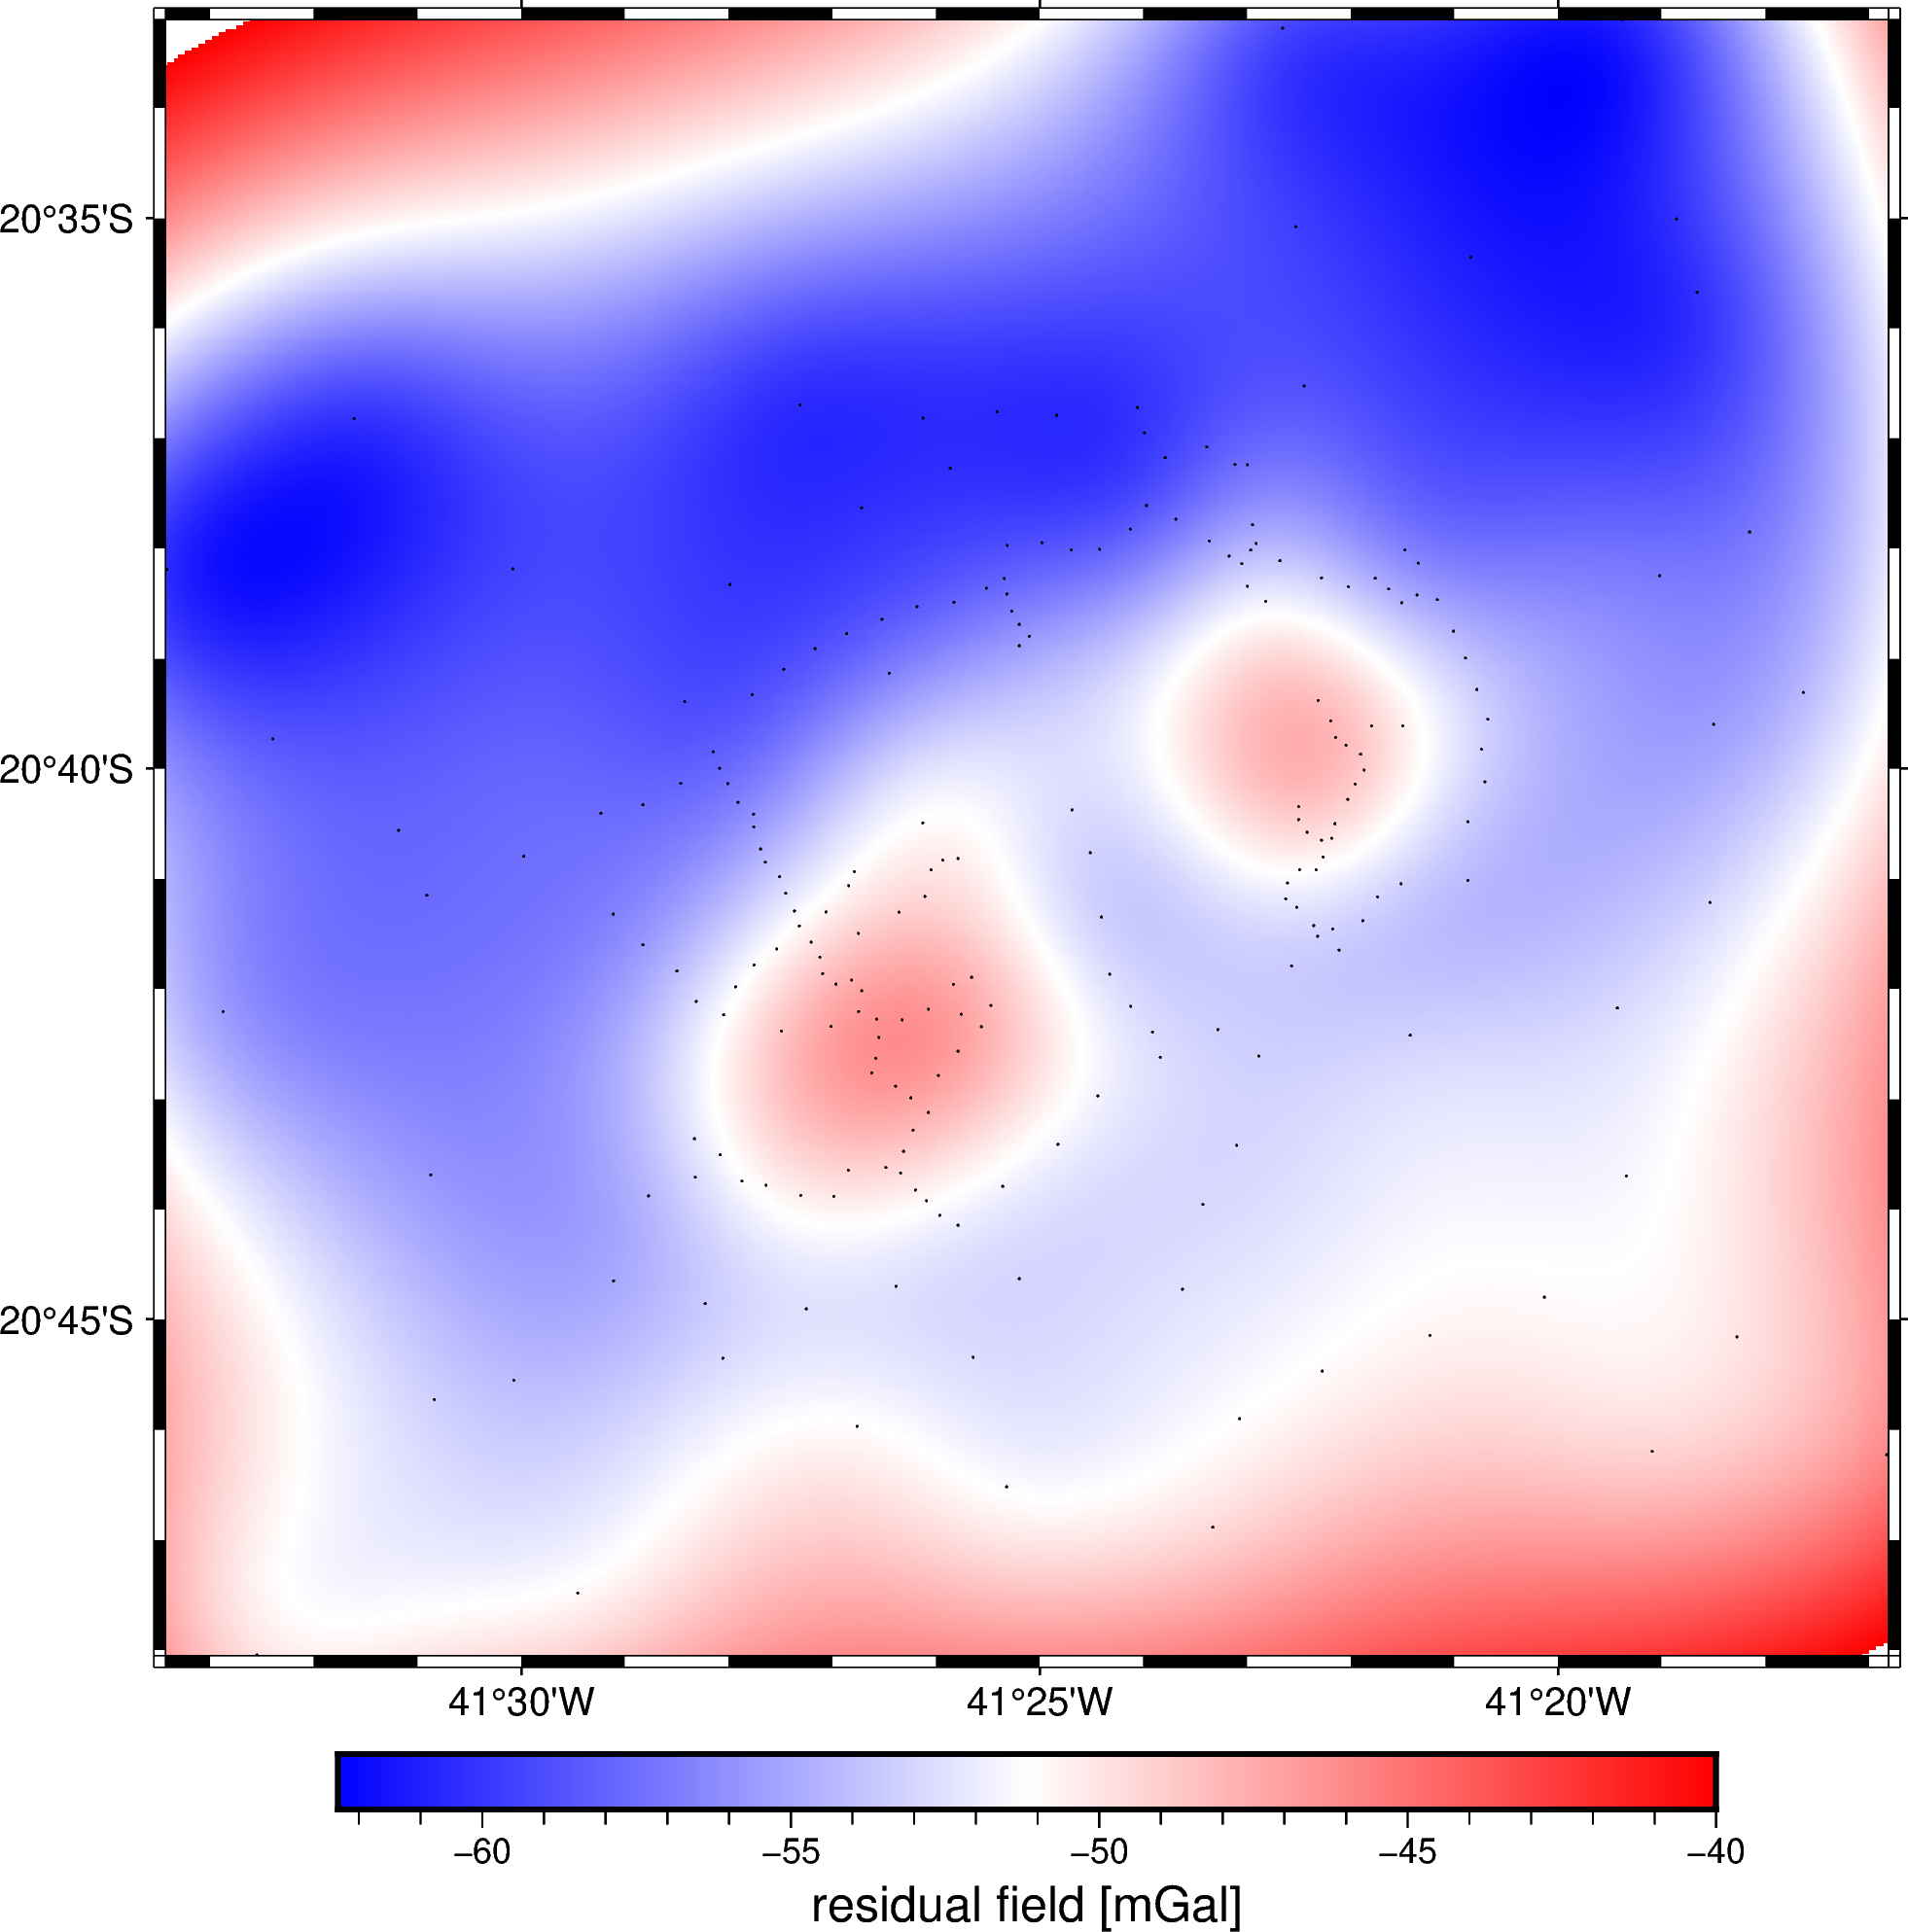

In [204]:
fig = pygmt.Figure()
scale = vd.maxabs(regional_grid.gravity_bouguer)
pygmt.makecpt(cmap="polar", series=[-scale, -40], no_bg=True)
fig.grdimage(
    regional_grid.gravity_bouguer,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [205]:
### Validação cruzada entre dados de grav residual e camada equivalente
r2_score = np.mean(
    vd.cross_val_score(
        eqs_regional,
        coordinates,
        data.gravity_bouguer_mgal,
    )
)
print(f'O R² do modelo de camada equivalente para os dados é de: {r2_score:.3f}')

O R² do modelo de camada equivalente para os dados é de: 0.782


In [206]:
regional_grid = regional_grid.assign(derivative_easting=hm.derivative_easting(regional_grid.gravity_bouguer, order=1, method='finite-diff'))
regional_grid = regional_grid.assign(derivative_northing=hm.derivative_northing(regional_grid.gravity_bouguer, order=1, method='finite-diff'))
regional_grid = regional_grid.assign(derivative_upward=hm.derivative_upward(regional_grid.gravity_bouguer, order=1))

regional_grid = regional_grid.assign(TG=np.sqrt(regional_grid.derivative_easting**2  +
                                                regional_grid.derivative_northing**2 +
                                                regional_grid.derivative_northing**2
                                               ))

regional_grid

<xarray.Dataset>
Dimensions:              (latitude: 447, longitude: 499)
Coordinates:
  * longitude            (longitude) float64 -41.56 -41.56 ... -41.28 -41.28
  * latitude             (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward               (latitude, longitude) float64 900.0 900.0 ... 900.0
Data variables:
    gravity_bouguer      (latitude, longitude) float64 -46.78 -46.92 ... -47.15
    derivative_easting   (latitude, longitude) float64 -264.8 -263.3 ... 324.4
    derivative_northing  (latitude, longitude) float64 -127.8 -128.3 ... 155.7
    derivative_upward    (latitude, longitude) float64 -1.546e+04 ... -1.647e+04
    TG                   (latitude, longitude) float64 320.6 319.8 ... 392.0
Attributes:
    metadata:  Generated by EquivalentSources(damping=0.1, depth=3000.0)

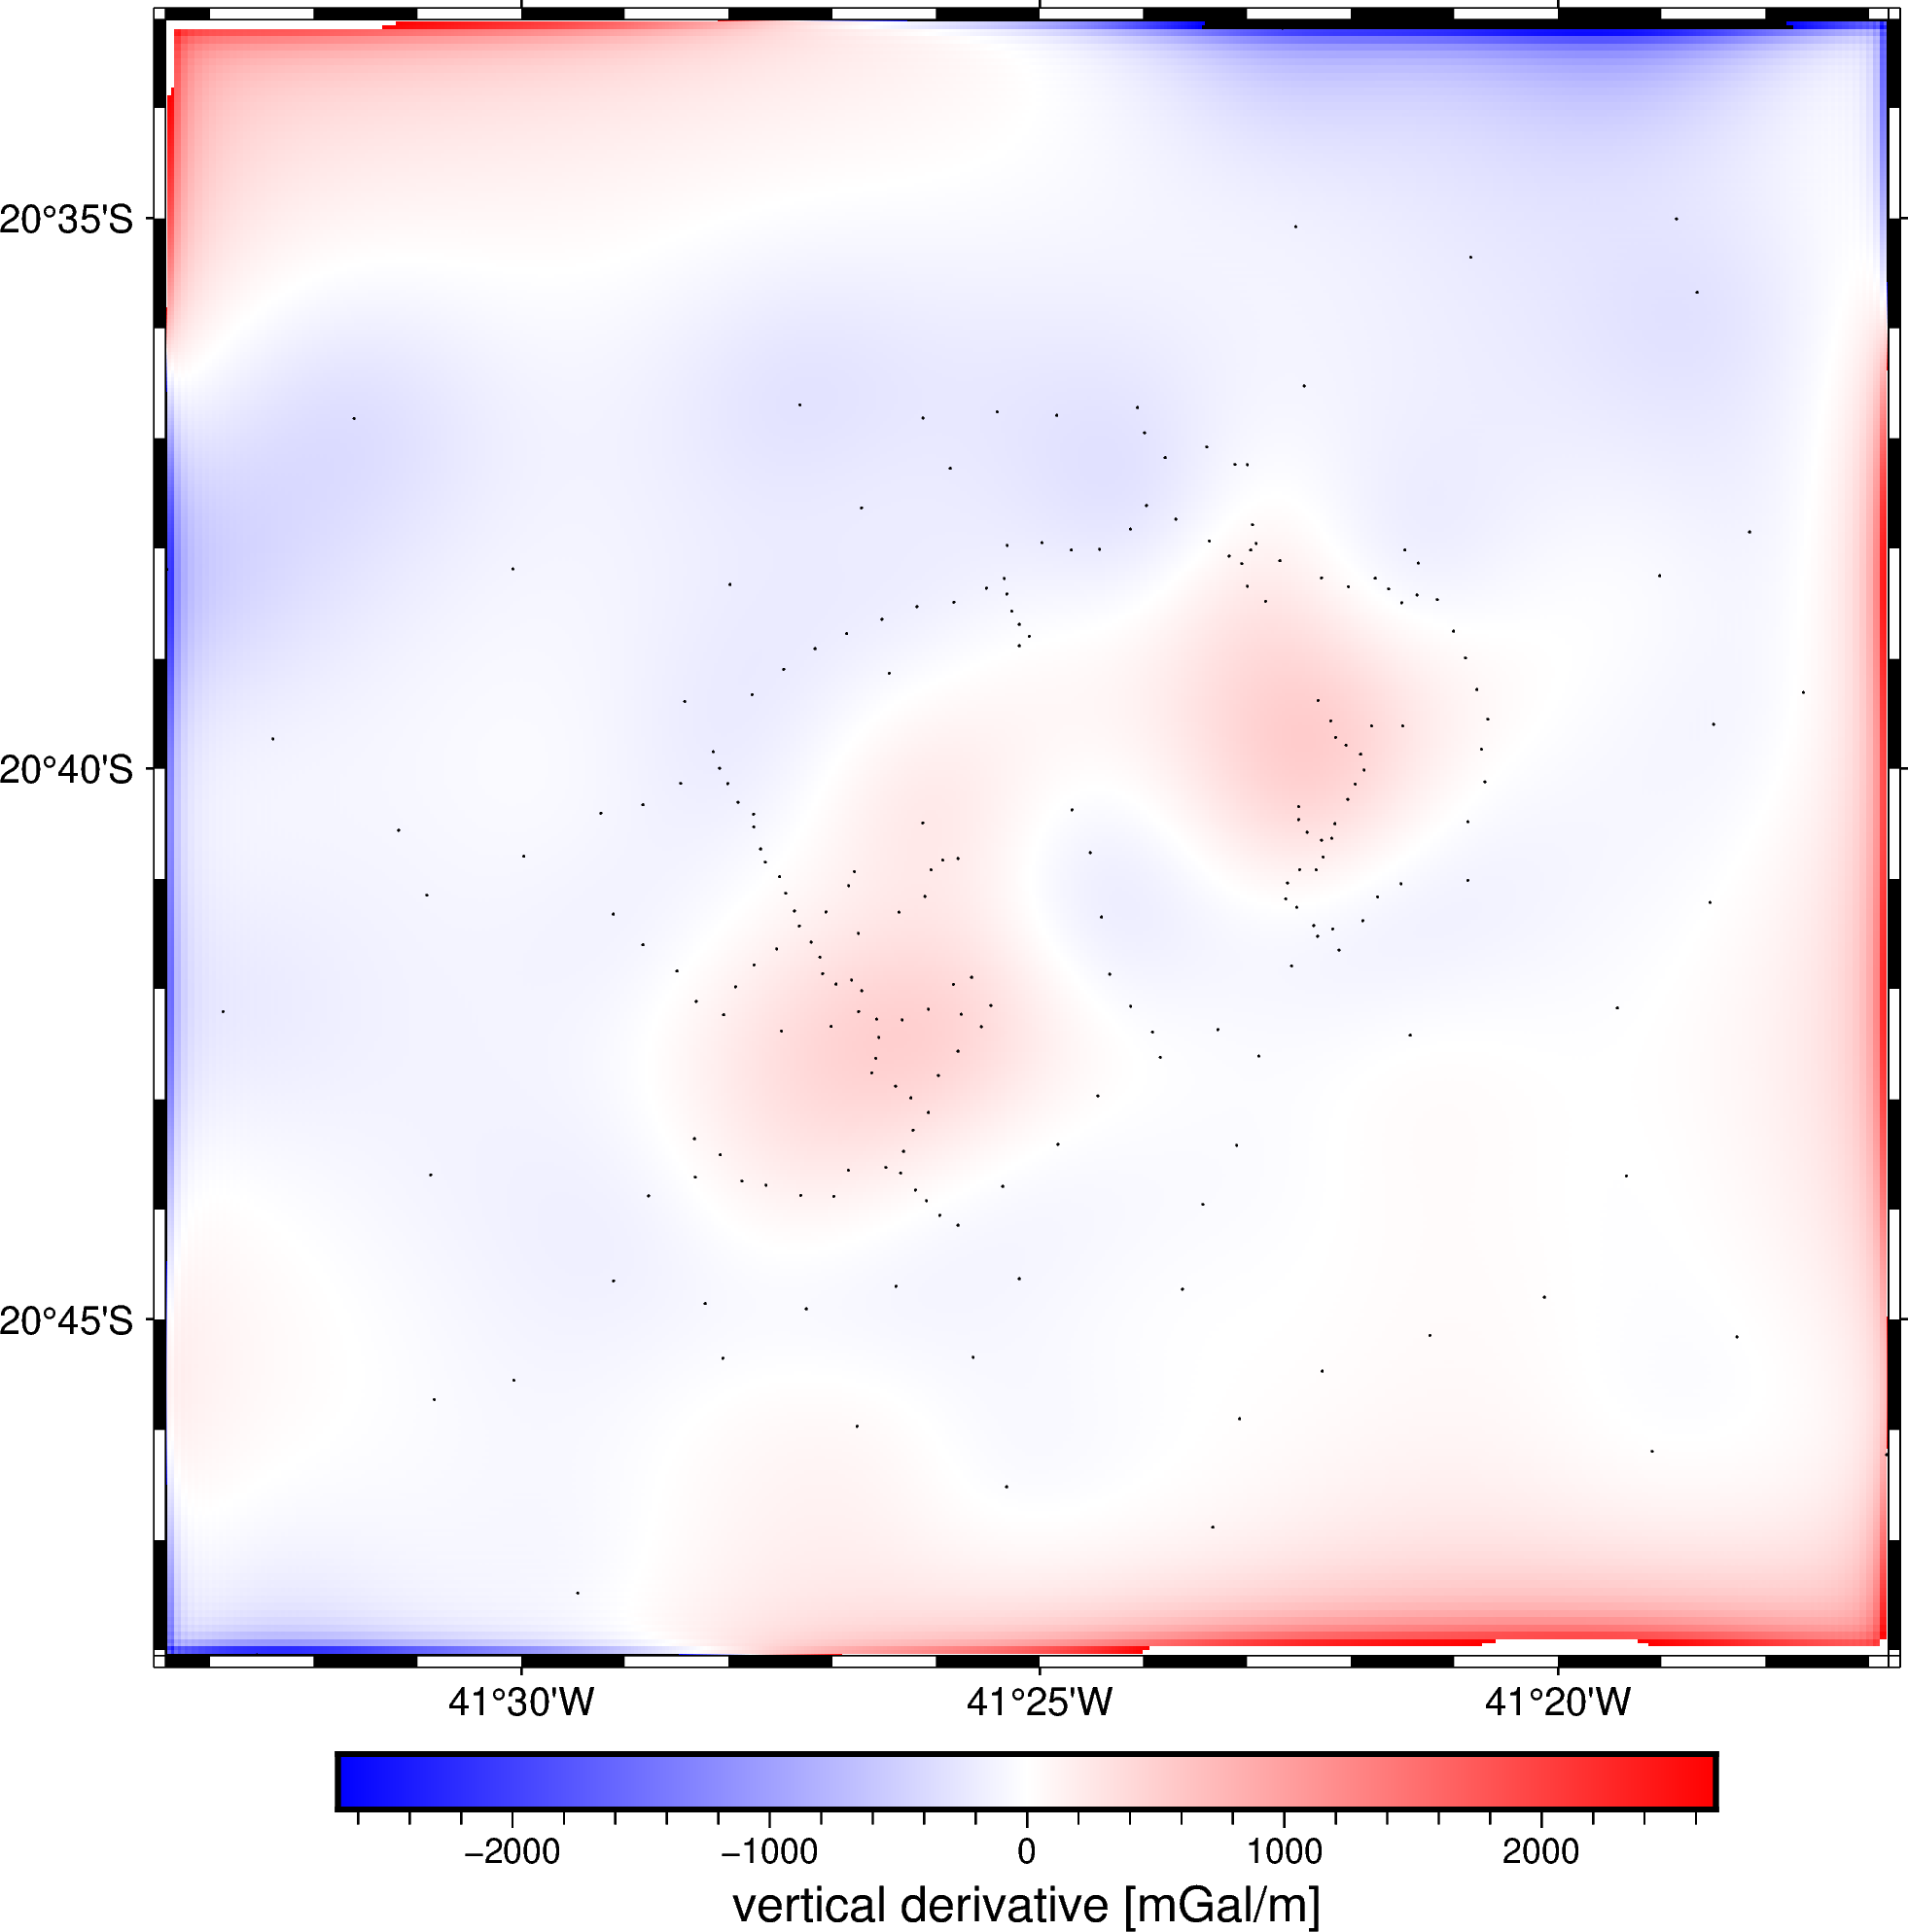

In [207]:
fig = pygmt.Figure()
scale = vd.maxabs(regional_grid.derivative_upward)
pygmt.makecpt(cmap="polar", series=[-scale/10, scale/10], no_bg=True)
fig.grdimage(
    regional_grid.derivative_upward,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"vertical derivative [mGal/m]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [314]:
regional_table = vd.grid_to_table(regional_grid)
interpolator = vd.KNeighbors()
interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_upward)
data = data.assign(bouguer_derivative_upward=interpolator.predict((data.longitude, data.latitude)))

interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_easting)
data = data.assign(bouguer_derivative_easting=interpolator.predict((data.longitude, data.latitude)))

interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_northing)
data = data.assign(bouguer_derivative_northing=interpolator.predict((data.longitude, data.latitude)))

data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,...,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m,gravity_bouguer_mgal,regional_mgal,residual_mgal,bouguer_derivative_upward,bouguer_derivative_easting,bouguer_derivative_northing
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,...,978637.755893,-46.349288,238246.104213,7.702141e+06,-55.450275,-50.734278,-4.715997,-47.423015,-70.347454,-58.043415
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,...,978636.310346,-44.864570,239573.565308,7.702483e+06,-56.916306,-50.703081,-6.213225,-88.459512,-22.619552,-78.752628
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,...,978646.141191,-47.667672,241216.748956,7.704176e+06,-57.852281,-51.404064,-6.448218,-147.111623,65.379172,-47.042695
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,...,978643.198869,-45.388990,243071.287960,7.702906e+06,-54.531304,-50.341706,-4.189598,-39.686698,71.569112,-84.595557
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,...,978643.532181,-41.786546,245332.547009,7.701803e+06,-52.116174,-49.305531,-2.810644,58.925620,-25.252841,-123.377805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203015.00,17:06:00,2019/12/16,264.94,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,...,978593.592668,-38.414026,245174.133206,7.717189e+06,-62.128658,-58.301461,-3.827197,-209.127253,26.632739,-55.720981
223,224,2168435.00,09:38:00,2019/12/17,204.11,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,...,978615.508625,-41.776541,239604.189759,7.711266e+06,-59.352172,-55.817540,-3.534632,-81.214221,15.042356,-19.450096
224,225,2164.15,11:52:00,2019/12/17,226.73,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,...,978608.293091,-38.846680,237502.245723,7.711667e+06,-60.236340,-56.416191,-3.820149,-92.913155,5.041263,-29.036087
225,226,2135695.00,15:49:00,2019/12/17,443.57,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,...,978548.250028,-7.481152,240697.890126,7.698939e+06,-52.723844,-48.442097,-4.281747,-63.374696,63.117424,-158.004246


# Calculate equivalente layer for bzz

\begin{equation}
g_{zz}(x_i, yi, z_i) = 2 \pi G \Delta \theta \left ( \dfrac{1}{\left(z_\text{i}-z_0\right)^2+\left(y_\text{i}-y_0\right)^2+\left(x_\text{i}-x_0\right)^2}-\dfrac{2\left(z_\text{i}-z_0\right)^2}{\left(\left(z_\text{i}-z_0\right)^2+\left(y_\text{i}-y_0\right)^2+\left(x_\text{i}-x_0\right)^2\right)^2} \right )
\end{equation}
    
onde:     
$\Delta \theta$ = massa pontual $(\Delta \rho R^3 )$, sendo a multiplicação entre contraste de densidade entre o corpo e a sua encaixante ($\Delta \rho$, em $kg~m^{-3}$) pelo é raio do corpo ao cubo ($R^3$, em $m^3$); \
$G = 6.67x10^{-11}$ é constante da gravitação universal (em $m^3~kg^{-1}~s^{-2}$); \
$(x_j, y_j, z_j)$ posição da fonte de massa pontual (em $m$); \
$(x_i, y_i, z_i)$ posição de observação (em $m$);

In [315]:
def matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j):
    gamma = 6.67e-11 # constante de gravitação universal, mudei o nome para não confundir com a matriz G
    cte   = 2*np.pi*gamma *10**5 # convertitido para mGal
    G = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gz = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gx = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gy = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    
    
    for j in range(len(x_j)):
        for i in range(len(x_i)):
            
            delta_x = x_i[i] - x_j[j]
            delta_y = y_i[i] - y_j[j]
            delta_z = z_i[i] - z_j[j]
            r2 = delta_x**2 + delta_y**2 + delta_z**2

            # cada ponto obs tem q considerar o efeito de cada túnel
            gz_i_j  = cte*(delta_z/r2)
            gzz_i_j = cte*(1/r2-2*delta_z/r2**2) 

            gzx_i_j  = cte*(-2*delta_x*delta_z/r2**2)
            gzy_i_j  = cte*(-2*delta_y*delta_z/r2**2)
            
            G[i,j]  = gz_i_j  
            Gz[i,j] = gzz_i_j
            Gx[i,j] = gzx_i_j
            Gy[i,j] = gzy_i_j
            
    return G, Gz, Gy, Gx
    
    


def eq_la_bzz(data, grid, extra_coord=0):
    x_i, y_i, z_i = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values
    # x_j, y_j = grid[0].ravel(), grid[1].ravel()
    # z_j = x_j*0 + extra_coord

    x_j, y_j, z_j = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values*0+extra_coord

    G, Gz, Gy, Gx = matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j)
    
    
    m = (np.linalg.inv(Gz.T@Gz))@(Gz.T@data.bouguer_derivative_upward)
    predicted_z_derivative = Gz@m
    m = (np.linalg.inv(Gx.T@Gx))@(Gx.T@data.bouguer_derivative_easting)
    predicted_y_derivative = Gx@m
    m = (np.linalg.inv(Gy.T@Gy))@(Gy.T@data.bouguer_derivative_northing)
    predicted_x_derivative = Gy@m
    m = (np.linalg.inv(G.T@G))@(G.T@data.gravity_bouguer_mgal)
    predicted_bouguer      = G@m

    return predicted_z_derivative, predicted_y_derivative, predicted_x_derivative, predicted_bouguer


In [316]:
easting_grid, northing_grid = projection(coordinates_grid[0], coordinates_grid[1])
grid = [easting_grid, northing_grid]
predicted_z_derivative, predicted_y_derivative, predicted_x_derivative, predicted_bouguer = eq_la_bzz(data, grid, extra_coord=-1000)

In [318]:
for i in range(10):
    print(data.bouguer_derivative_upward.values[i], predicted_derivative[i])

print()
print(1 - np.sum( (data.bouguer_derivative_upward.values - predicted_z_derivative)**2))
print()

for i in range(10):
    print(data.gravity_bouguer_mgal.values[i], predicted_bouguer[i])

print()
print(1 - np.sum( (data.gravity_bouguer_mgal.values - predicted_bouguer)**2))

-47.42301541419102 -47.423060570191865
-88.4595116020651 -88.45954815023066
-147.1116228219821 -147.11163159121512
-39.68669796189493 -39.68668514651813
58.92561963549469 58.92558151509485
-57.53658457232047 -57.53670474257359
-89.04195076931845 -89.04216888005212
-65.3277316504238 -65.32775401237221
-29.341611925952336 -29.34203697721017
23.06218042692742 23.06239565304719

0.999973035792047

-55.45027534212639 -55.45025495766553
-56.91630570782516 -56.91628653255046
-57.85228116755328 -57.85223308430023
-54.53130390855349 -54.53125446056345
-52.116174492384324 -52.11607562913102
-55.41489850982386 -55.415059308075136
-55.50946384098047 -55.50944246076508
-54.047447841982105 -54.04845495072382
-54.59765939250275 -54.59634729824735
-52.387037821671804 -52.38659625291257

0.9994799253470853


In [308]:
np.sum( (data.gravity_bouguer_mgal.values - teste)**2)

163873404546515.5